In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [5]:
HS_url = 'https://github.com/BrownRegaSterlingHeinen/PostsecondaryAttainment/blob/master/2016/Machine%20Learning%20Datasets/NCCCData_HSCCwithGeo_ML.csv?raw=true'
CC_url = 'https://github.com/BrownRegaSterlingHeinen/PostsecondaryAttainment/blob/master/2016/Machine%20Learning%20Datasets/NCCCData_ML.csv?raw=true'

HS = pd.read_csv(HS_url)
CC = pd.read_csv(CC_url)

In [6]:
print "We have", len(list(HS)),"variables in our high school data set and",len(list(CC)),"variables in our community college data set"

We have 651 variables in our high school data set and 323 variables in our community college data set


Dr. Drew's Jupyter Notebook: https://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2017/Models/District%20Level%20Relationships%20with%20Income%20Tax%20Data.ipynb

In [7]:
list(HS)

['Latitude_x',
 'Longitude_x',
 'Min_Distance_CC_miles',
 'Min_CC_ID',
 '2_Min_Distance_CC_miles',
 '2_Min_CC_ID',
 'Min_CC_Latitude.1',
 'szip_ad_y',
 'student_num',
 'lea_avg_student_num',
 'st_avg_student_num',
 '08_Size',
 'Biology_Size',
 'English II_Size',
 'Math I_Size',
 'lea_total_expense_num',
 'lea_salary_expense_pct',
 'lea_benefits_expense_pct',
 'lea_services_expense_pct',
 'lea_supplies_expense_pct',
 'lea_instruct_equip_exp_pct',
 'lea_federal_perpupil_num',
 'lea_local_perpupil_num',
 'lea_state_perpupil_num',
 'SPG Score',
 'EVAAS Growth Score',
 'Math I Score',
 'English II Score',
 'Biology Score',
 'ACT Score',
 'ACT WorkKeys Score',
 'Passing Math III',
 '4-Year Cohort Graduation Rate Score',
 'ACTMath_ACTBenchmark_All',
 'ACTScience_ACTBenchmark_All',
 'ACTWriting_ACTBenchmark_All',
 'EOCSubjects_CACR_All',
 'GraduationRate_5yr_All',
 'ACTCompositeScore_UNCMin_Female',
 'ACTWorkKeys_SilverPlus_Female',
 'EOCBiology_CACR_Female',
 'GraduationRate_4yr_Female',
 'Gr

In [8]:
list(CC)

['AdvESL_MeasureableSkills_Participant_POP_MSG',
 'AdvESL_MeasureableSkills_ParticipServed',
 'AdvESL_MeasureableSkills_AHSGrad',
 'AdvESL_MeasureableSkills_HSE',
 'AdvESL_MeasureableSkills_Postsecondary\r\nEnrollment',
 'AdvESL_MeasureableSkills_MSG',
 'Beg_ESL_PCTProgress',
 'LowBeg_ESL_PCTProgress',
 'HighBeg_ESL_PCTProgress',
 'LowInt_ESL_PCTProgress',
 'HighInt_ESL_PCTProgress',
 'Advanced_ESL_PCTProgress',
 'Basic_Skills_CompletingLevel\r\nLEVEL',
 'Basic_Skills_PCTCompleting',
 'Beg_ABE_Lit_PCTProgress',
 'Beg_BasicEd_PCTProgress',
 'LowInt_BasicEd_PCTProgress',
 'HighInt_BasicEd_PCTProgress',
 'Low_AdultSecondary_Students',
 'Low_AdultSecondary_PCTProgress',
 'BegABELit_Participant_POP_MSG',
 'BegABELit_IndividualsServed',
 'BegABELit_Particip/Served',
 'BegABELit_POPs',
 'BegABELit_AHSGrad',
 'BegABELit_HSE',
 'BegABELit_Postsecondary',
 'BegABELit_Posttest',
 'BegABELit_MSG',
 'BegBasicEd_Participant_POP_MSG',
 'BegBasicEd_Particip/Served',
 'BegBasicEd_AHSGrad',
 'BegBasicEd

In [9]:
fyp = CC["First_Year_Progression"]
no_fyp = CC.drop("First_Year_Progression", axis = 1)

In [10]:
fyp.describe()

count    59.000000
mean      0.708241
std       0.065048
min       0.539000
25%       0.668500
50%       0.708241
75%       0.754000
max       0.848000
Name: First_Year_Progression, dtype: float64

In [11]:
FirstYearSuccess = ['NumStudents1stYearSuccess_Age-15',
 'PCT1stYearSuccess_Age-15',
 'PCT1stYearSuccess_Age16-17',
 'PCT1stYearSuccess_Age18',
 'PCT1stYearSuccess_Age19-24',
 'NumStudents1stYearSuccess_Age25-39',
 'PCT1stYearSuccess_Age25-39',
 'NumStudents1stYearSuccess_Age40+',
 'PCT1stYearSuccess_Age40+',
 'AAF_1stYearSuccessPCT',
 'AAM_1stYearSuccessNumStudents',
 'AAM_1stYearSuccessPCT',
 'CF_1stYearSuccessNumStudents',
 'CF_1stYearSuccessPCT',
 'CM_1stYearSuccessPCT',
 'HF_1stYearSuccessPCT',
 'HM_1stYearSuccessPCT',
 'OF_1stYearSuccessPCT',
 'OM_1stYearSuccessNumStudents',
 'OM_1stYearSuccessPCT']

CC["Completers_150time_GrandTotal"] = CC["Completers_150time_men"]+CC["Completers_150time_women"]

Completers = [ 'Completers_150time_men',
 'Completers_150time_women',
 'Completers_150time_American Indian or Alaska Native',
 'Completers_150time_Asian',
 'Completers_150time_Black or African American',
 'Completers_150time_Hispanic',
 'Completers_150time_Native Hawaiian or Other Pacific Islander',
 'Completers_150time_White',
 'Completers_150time_Two or more races',
 'Completers_150time_Race/ethnicity unknown',
             'Completers_150time_GrandTotal']

Race_Totals = ['American Indian or Alaska Native total',
 'Asian total',
 'Native Hawaiian or Other Pacific Islander total',
 'White total',
 'Two or more races total',
 'Race/ethnicity unknown total',
 'Nonresident alien total']

Retention_Totals = [ 'Full-time retention rate  2016',
 'Part-time retention rate  2016']

Financial_Aid = ['Financial_Aid_StateLocalGrants',
 'StateLocalGrants_Avg',
 'Financial_Aid_InstitutionalGrants',
 'InstitutionalGrants_Avg',
 'Financial_Aid_Loans',
 'Loans_Avg']

Certificates = [ 'Certificate_Men_Number',
 'Certificate_Men_Percent']

Associates = [ 'Accosiates_Men_Percent',
 'Associates_Women_Percent']

AwardLess = ['AwardLess1Year_Men_Percent',
 'AwardLess1Year_Women_Number',
 'AwardLess1Year_Women_Percent',
 'AwardLess2Year_Total',
 'AwardLess2Year_Men_Percent']

In [12]:
#Create a function to plot regression lines for two variables
def PlotJoint(x,y,data):
    sns.set(context='notebook', style='darkgrid', font_scale=1.25)
    my_plot = sns.jointplot(x=x, y=y, data=data, kind="reg");
    my_plot.fig.set_figwidth(8)
    my_plot.fig.set_figheight(8)

### First Year Success

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

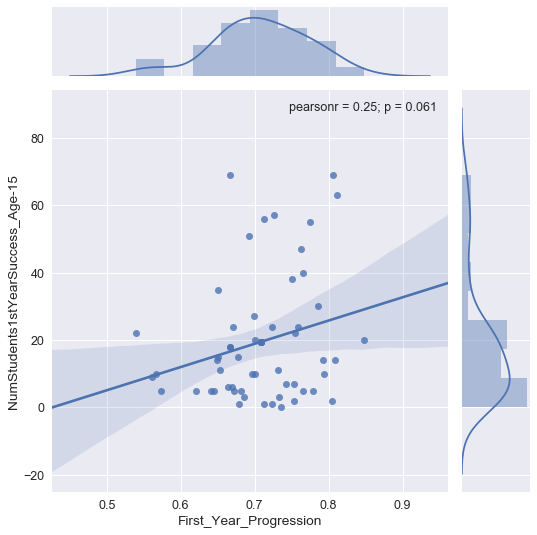

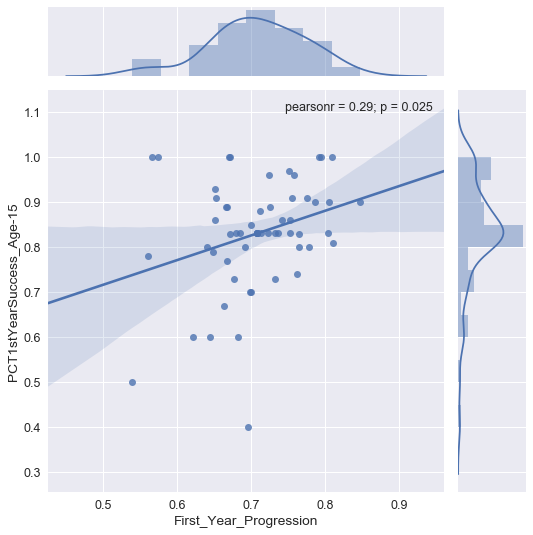

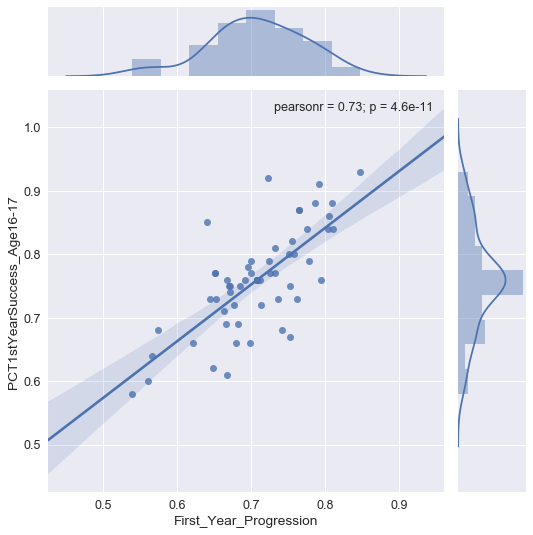

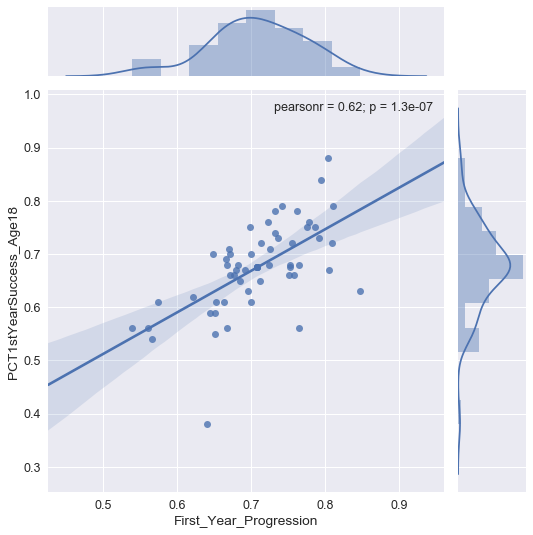

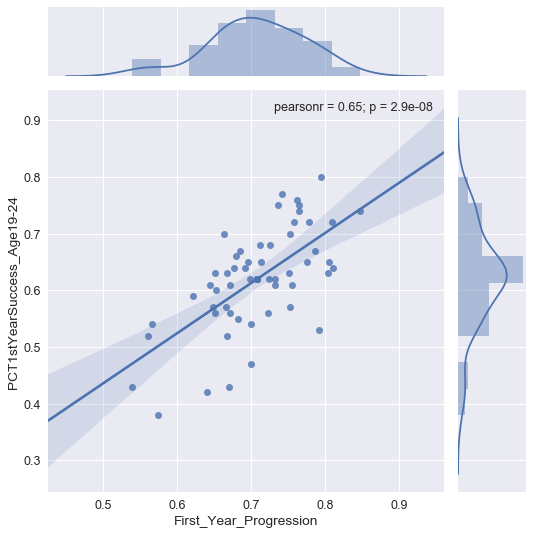

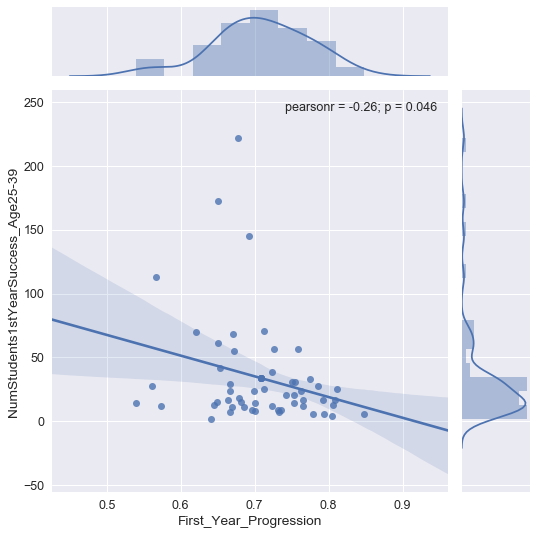

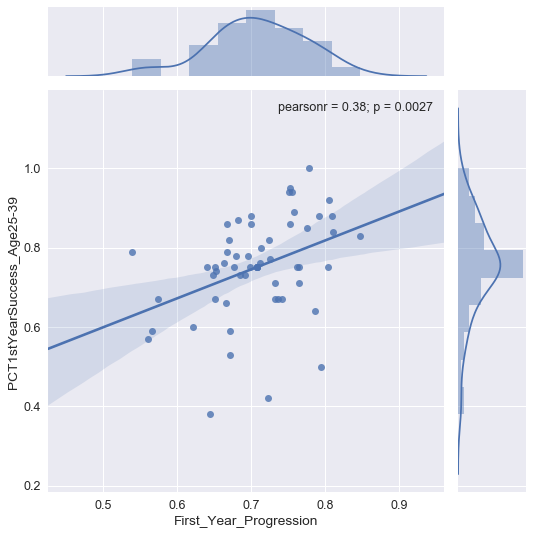

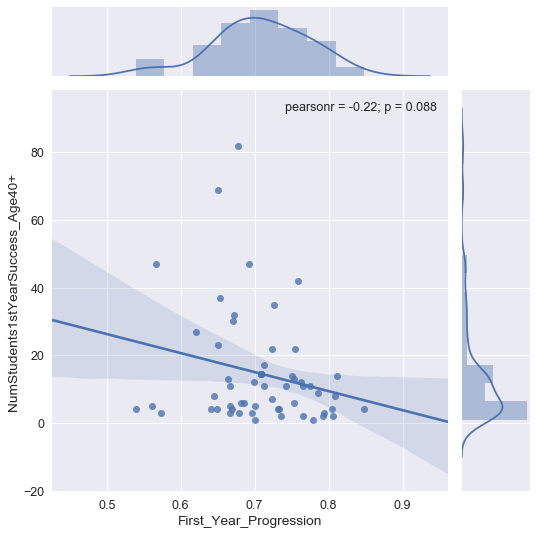

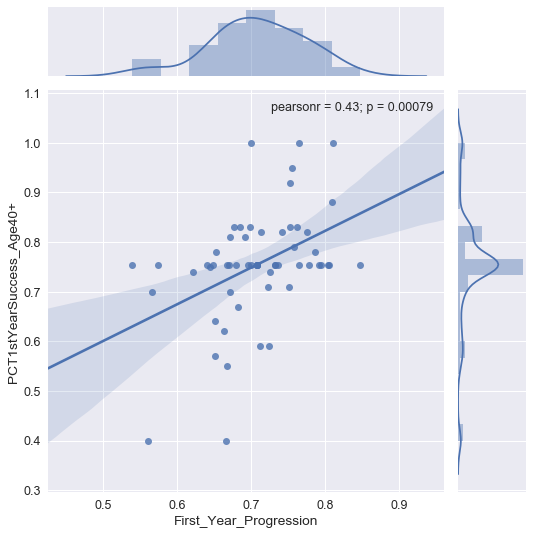

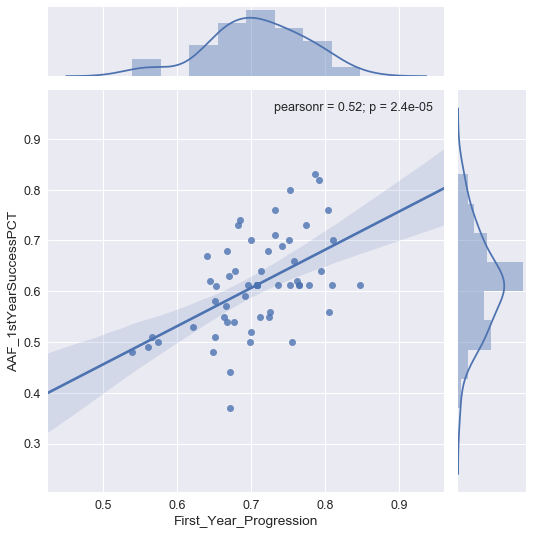

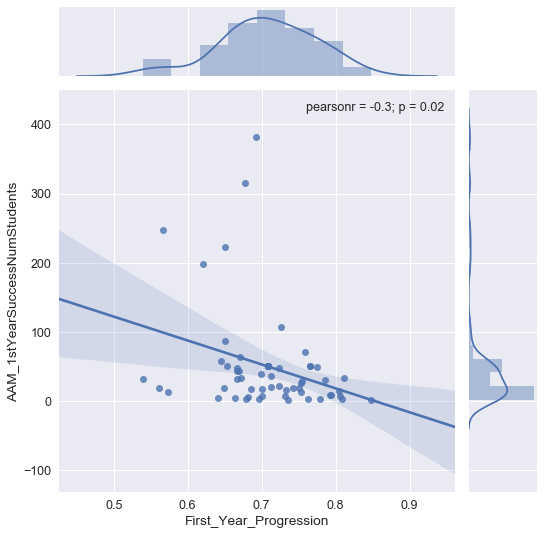

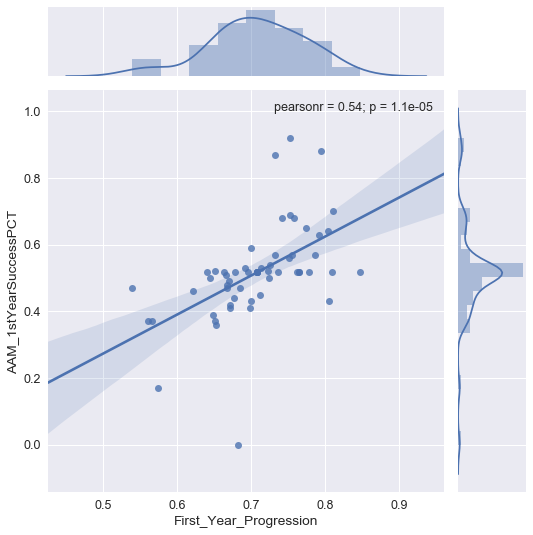

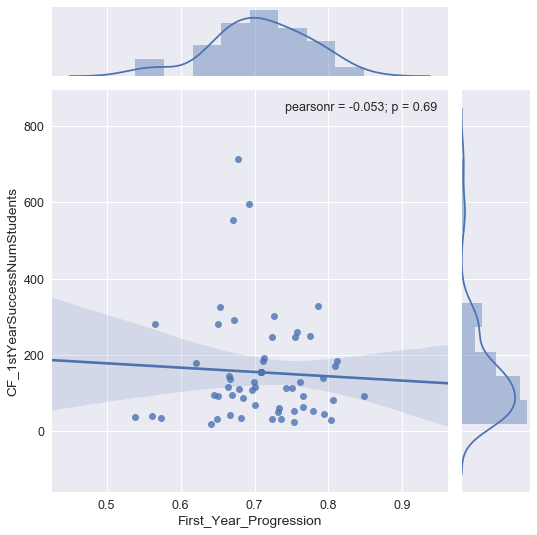

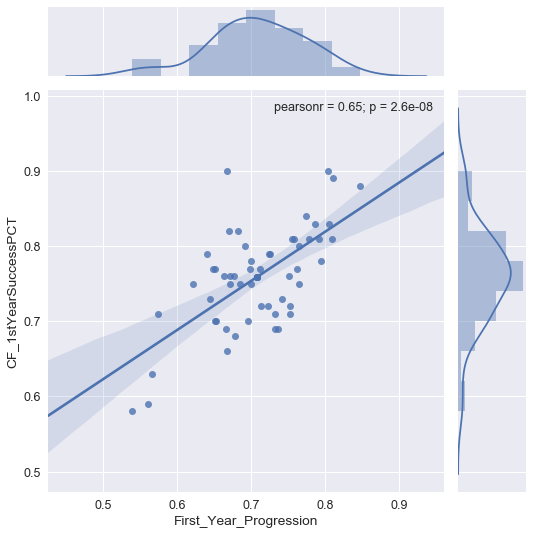

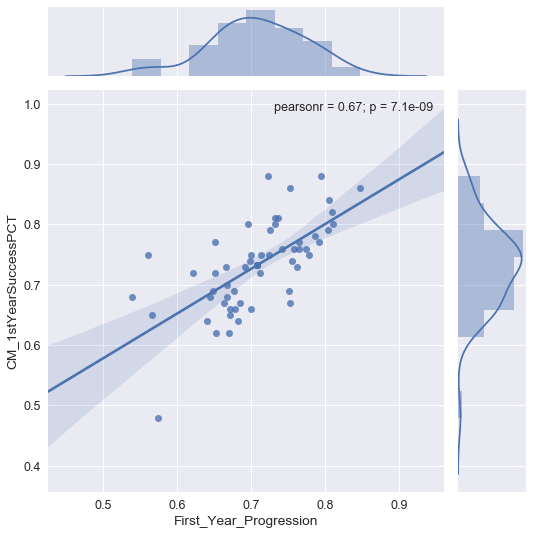

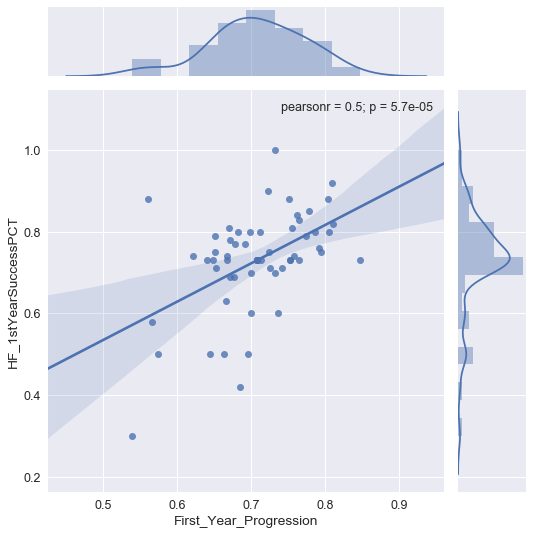

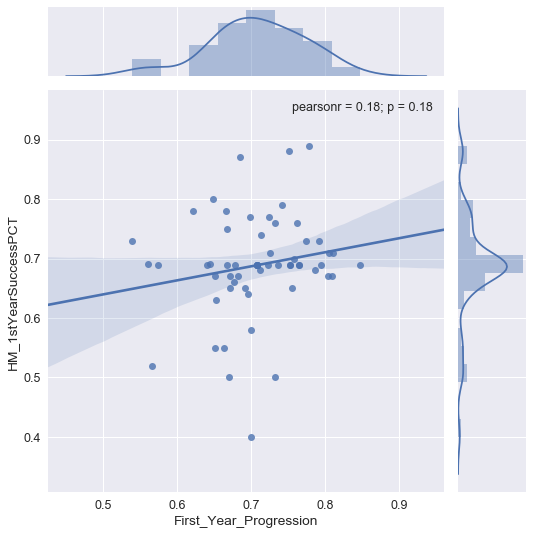

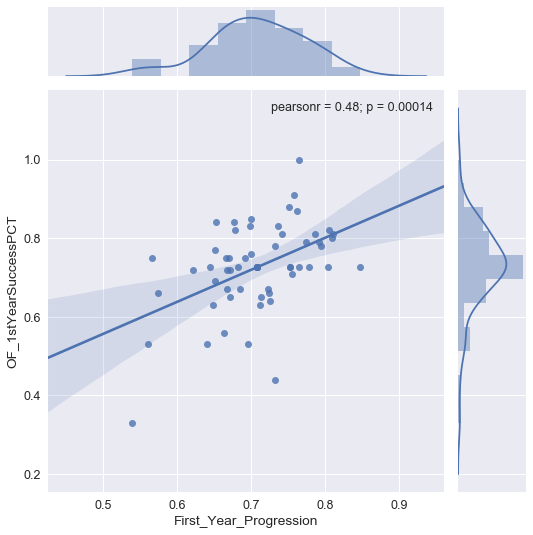

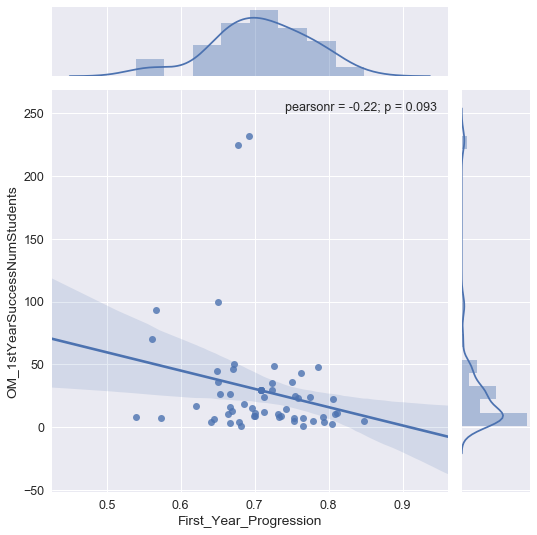

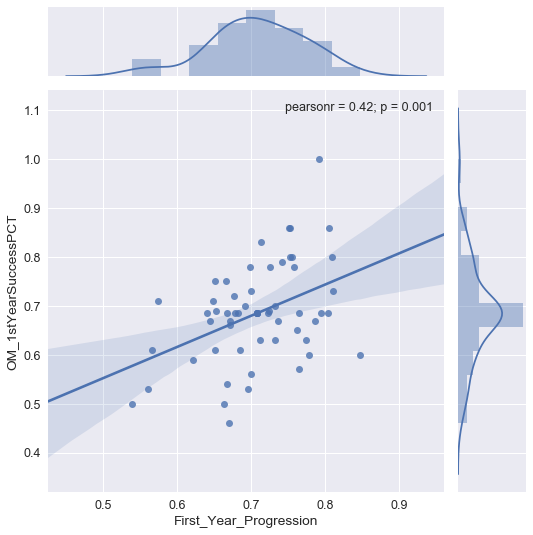

In [18]:
# Comparing First Year Progression with other variables measuring different levels of success in the first year
for col in FirstYearSuccess:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### Completers

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

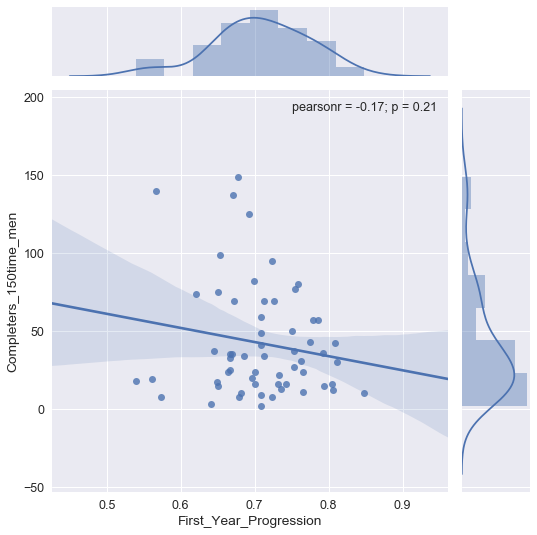

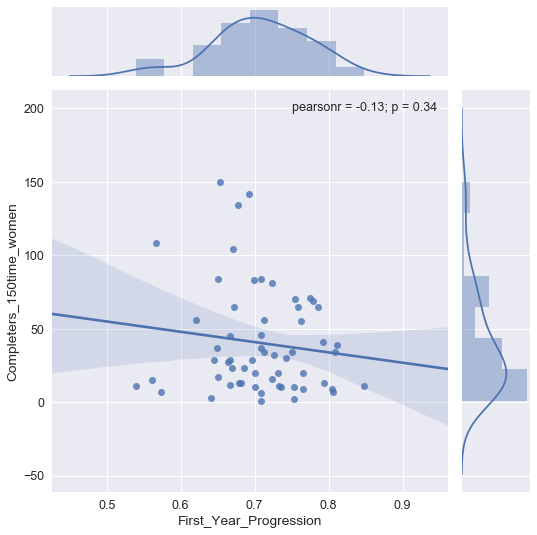

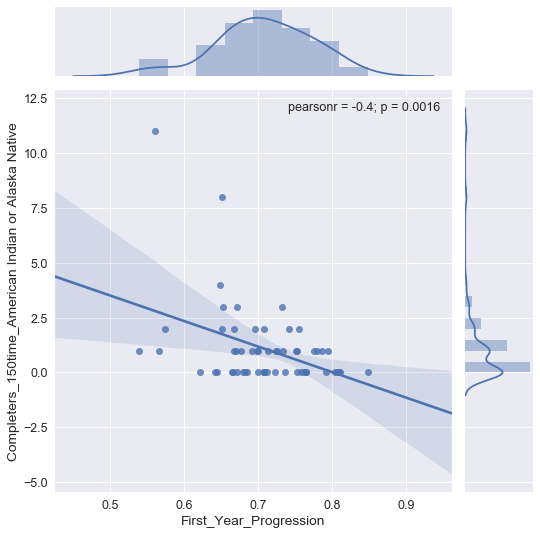

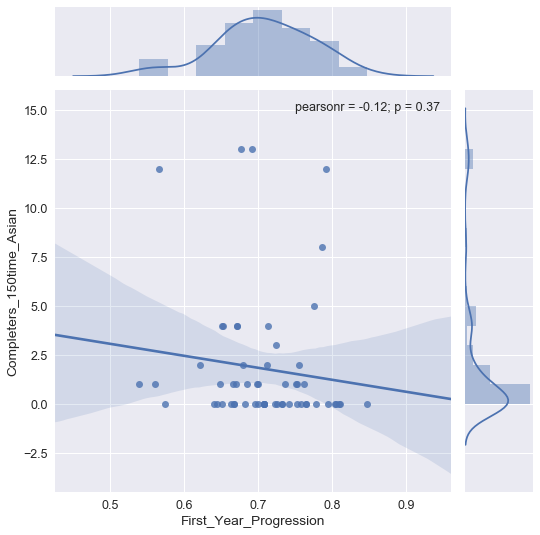

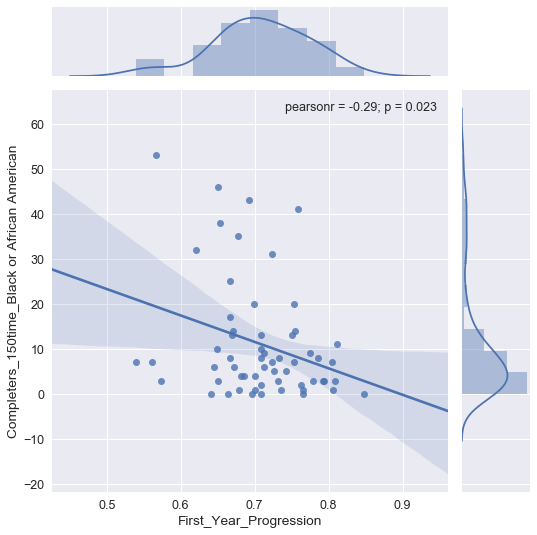

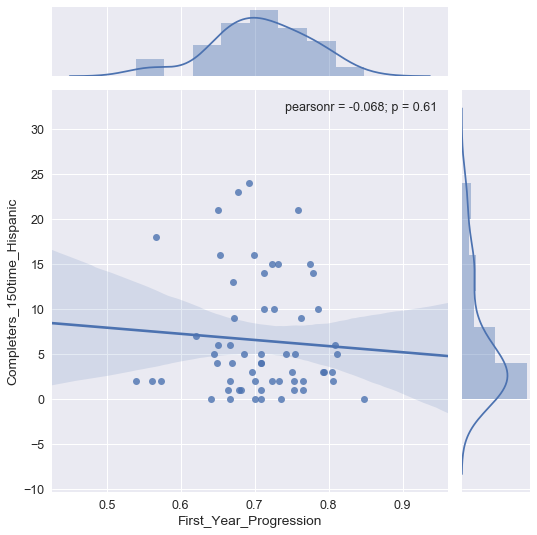

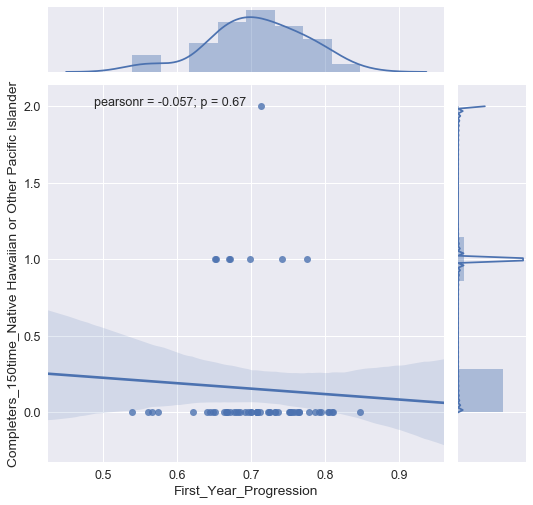

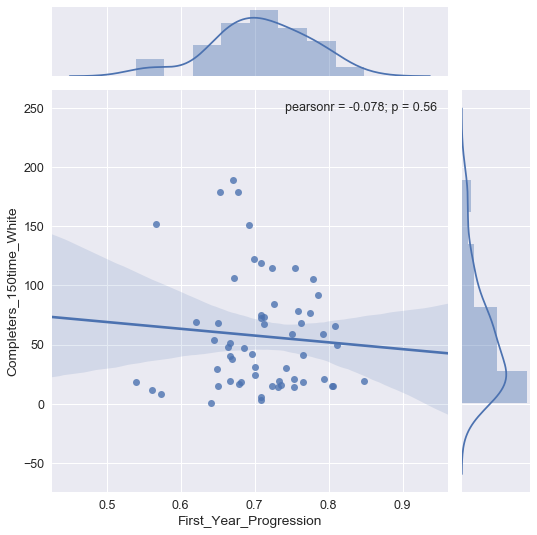

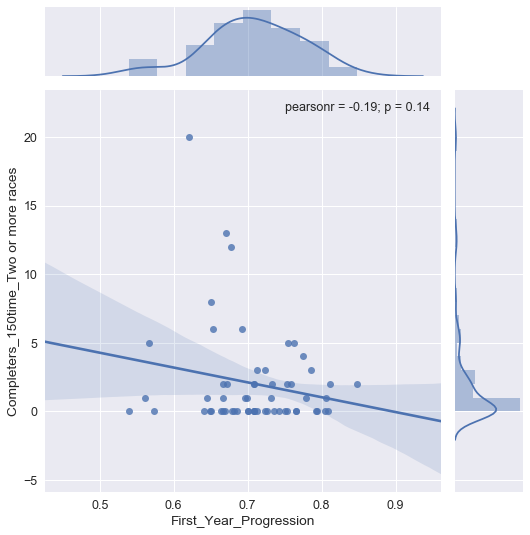

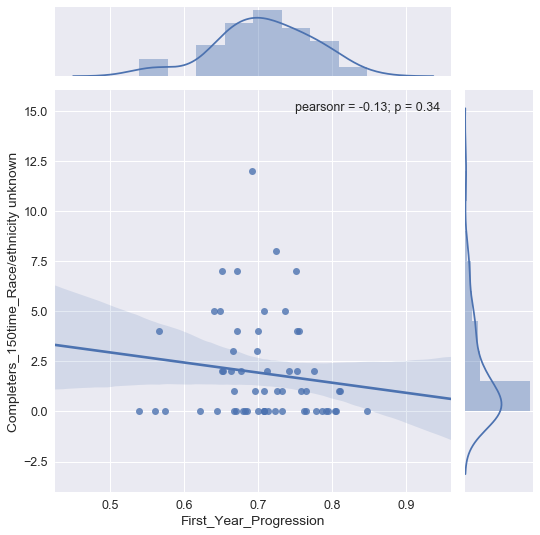

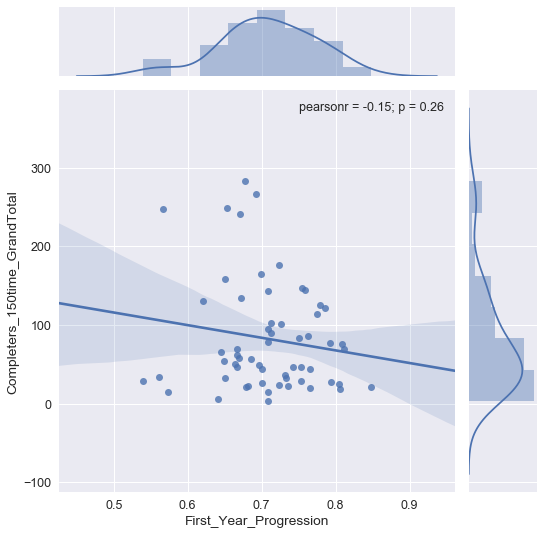

In [22]:
#Create district level charts to compare against Avg Tot Income
for col in Completers:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### Retention_Totals

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


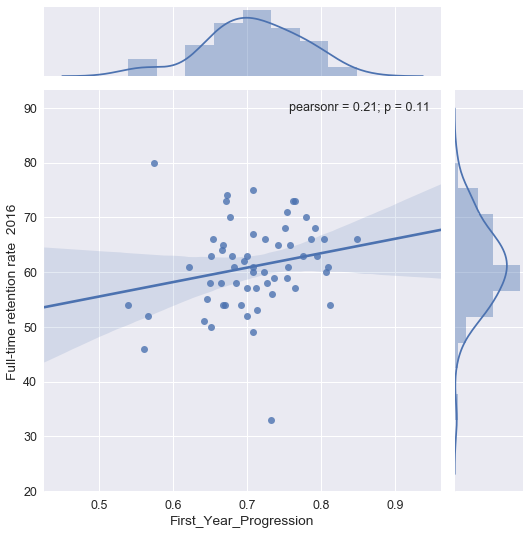

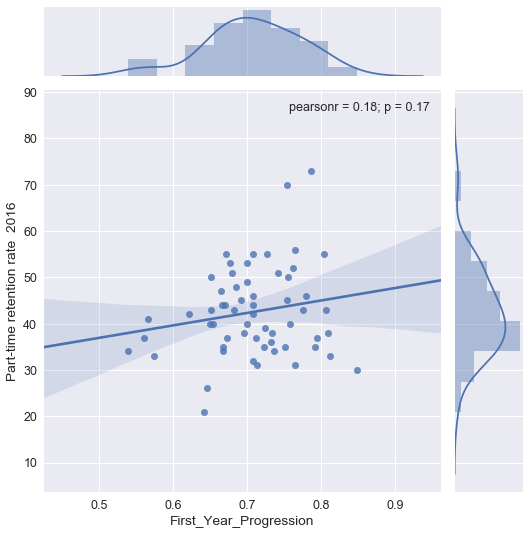

In [26]:
for col in Retention_Totals:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### Race_Totals

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

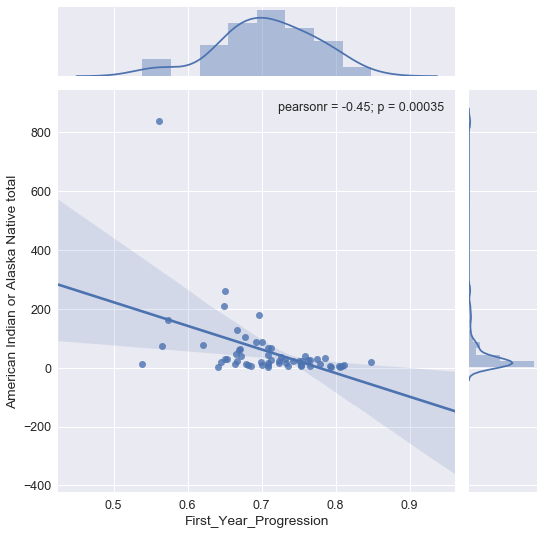

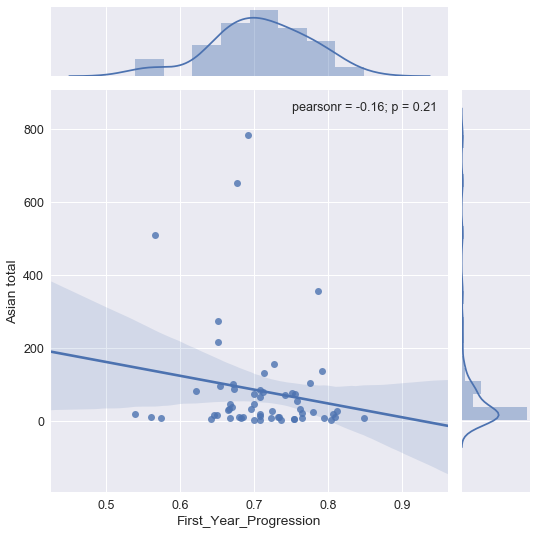

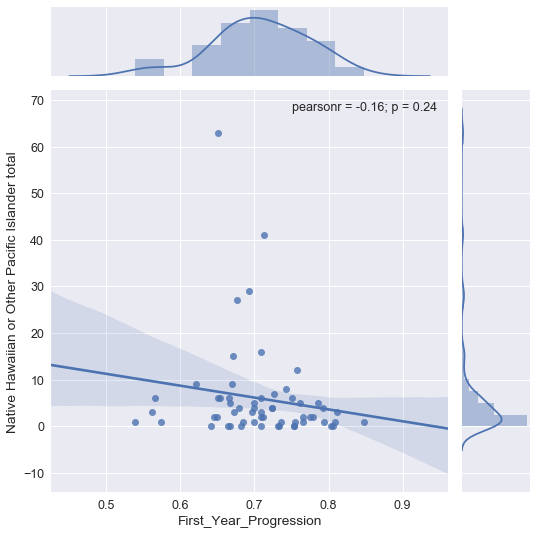

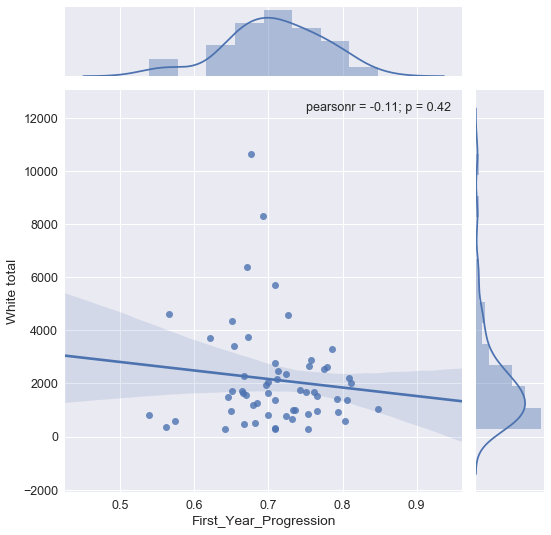

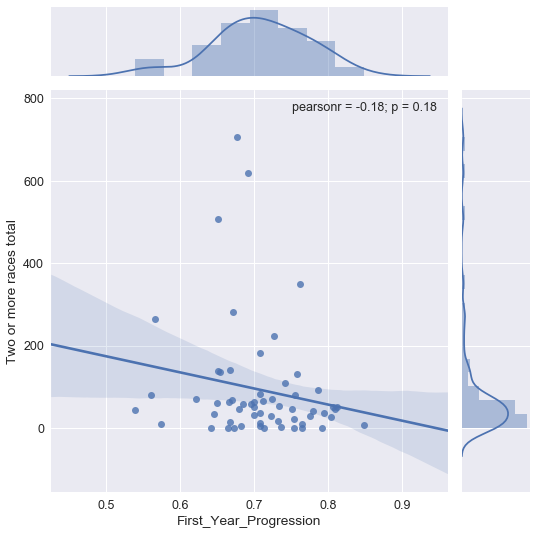

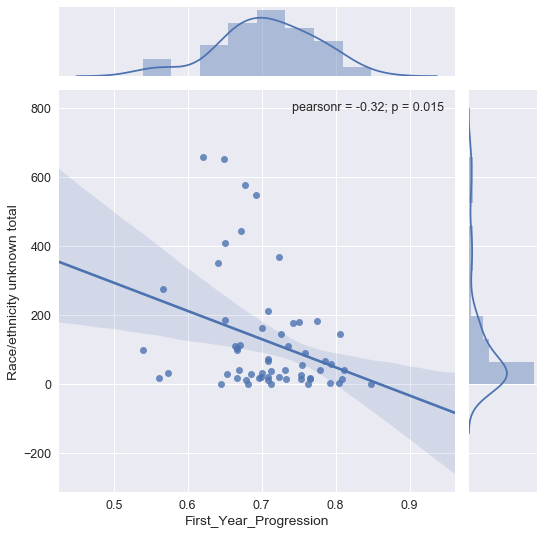

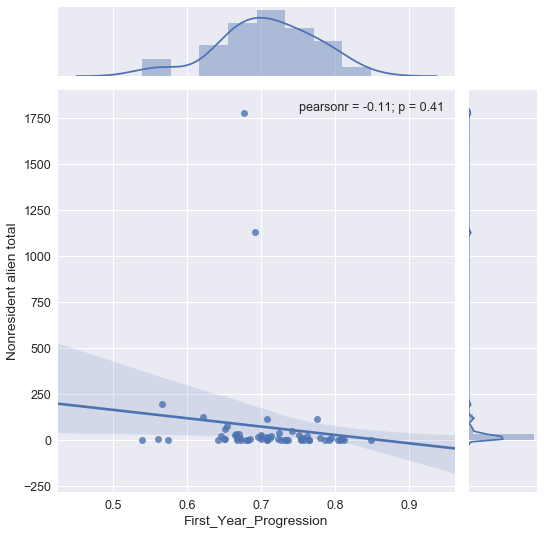

In [27]:
for col in Race_Totals:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### Financial_Aid

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

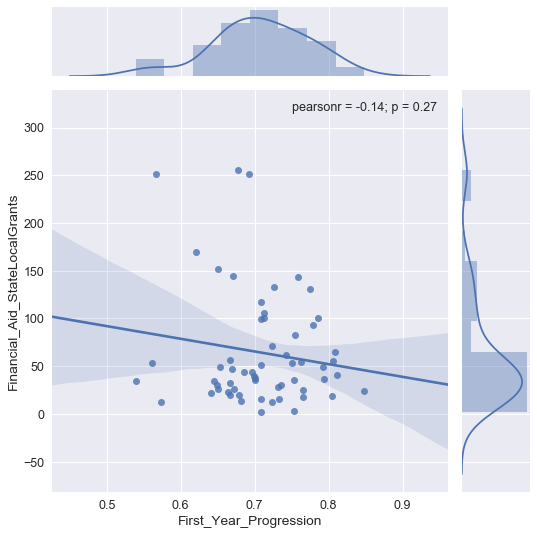

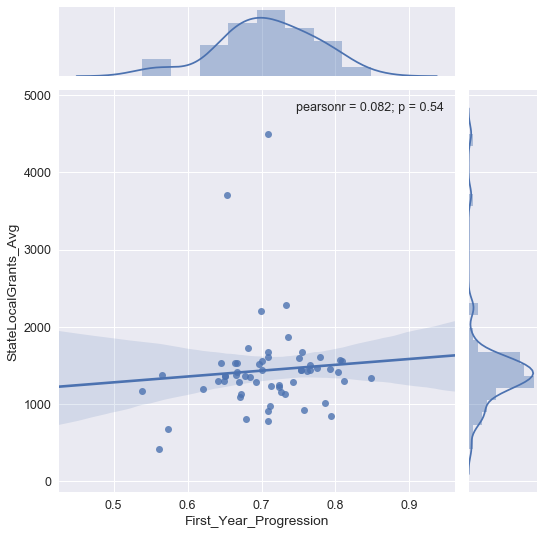

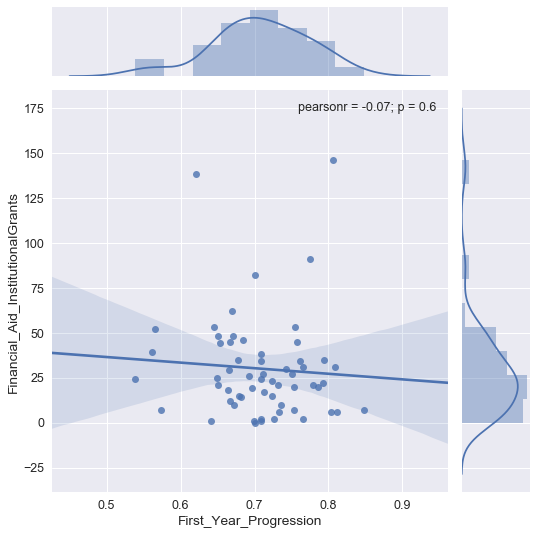

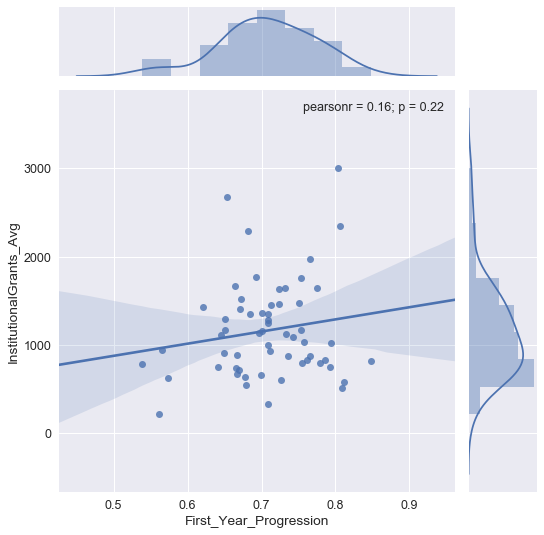

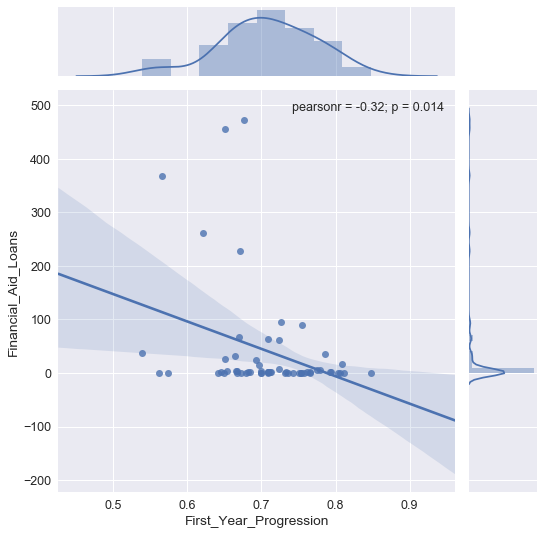

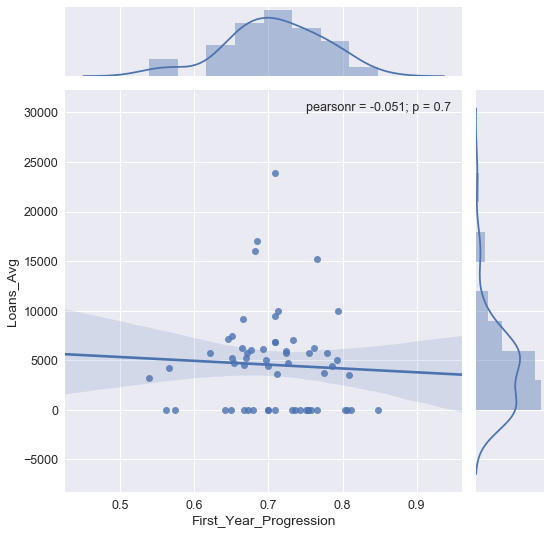

In [31]:
for col in Financial_Aid:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### Certificates

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


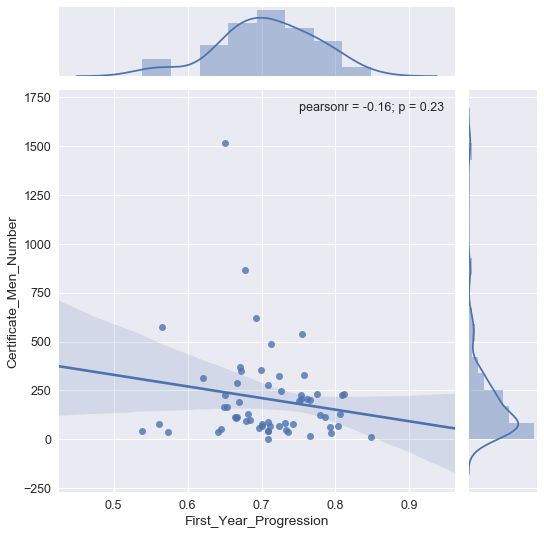

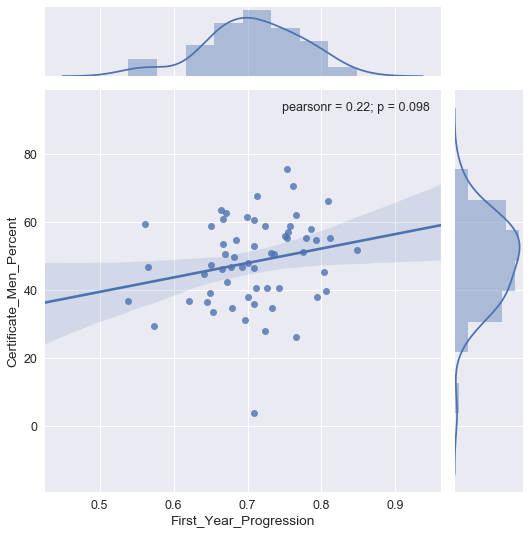

In [32]:
for col in Certificates:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### Associates

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


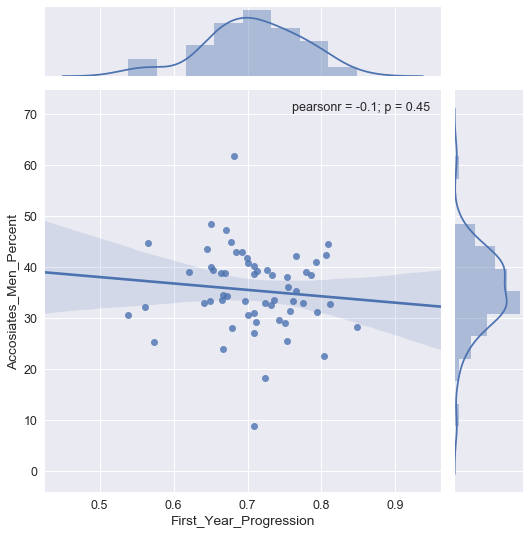

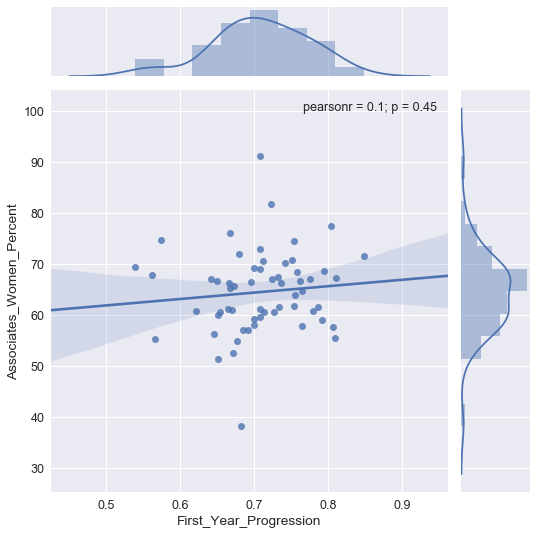

In [34]:
for col in Associates:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

### AwardLess

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

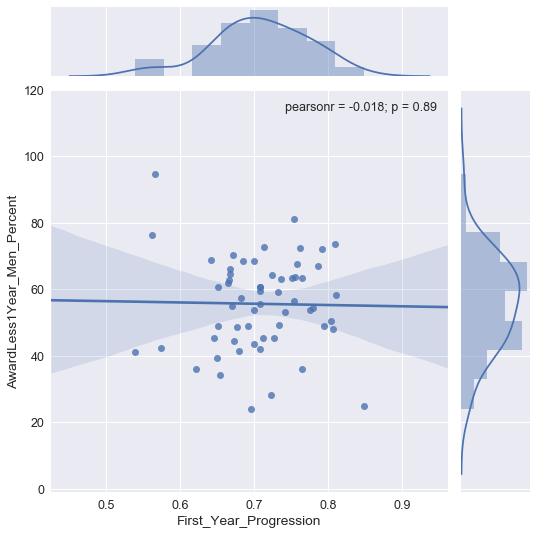

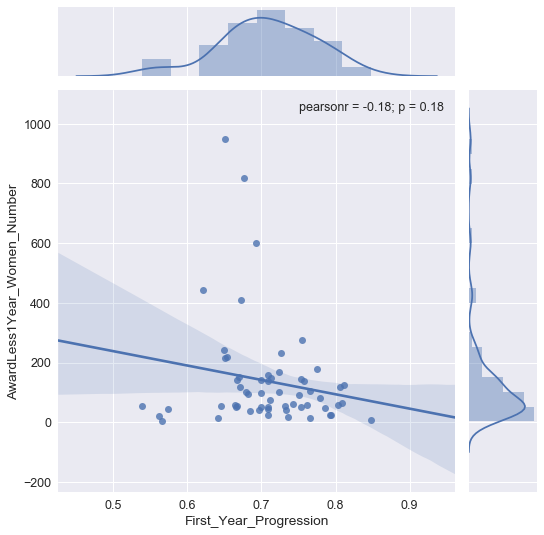

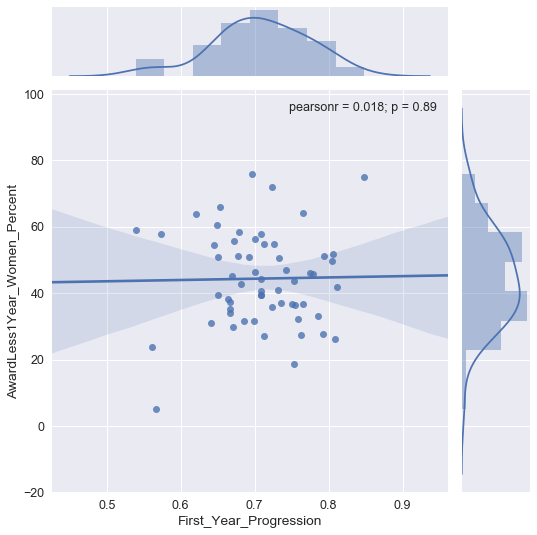

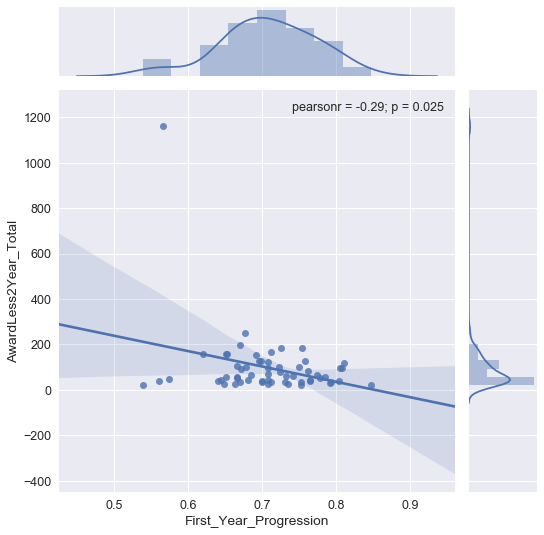

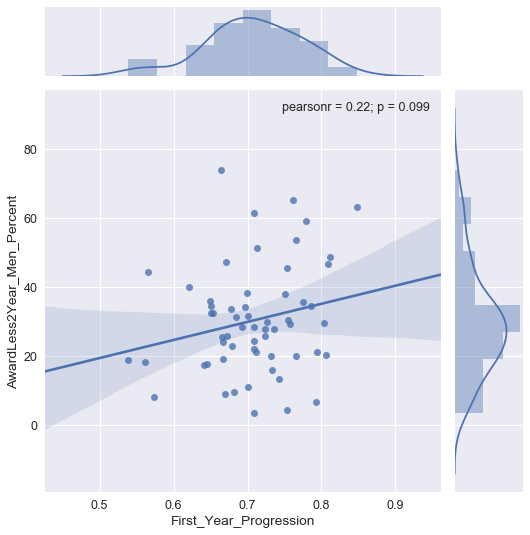

In [35]:
for col in AwardLess:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

## While this is interesting, it would be more interesting to only look at the relationships with significant relationships

In [29]:
from scipy.stats import pearsonr

# create empty list of the ositive relationship variables and the negative
pos_r = []
neg_r = []
for col in list(CC): # looping through all of the columns in our data set
    if col != "First_Year_Progression": # we don't want to include our column of interest
        r = pearsonr(CC["First_Year_Progression"], CC[col]) # creates a tuple with pearson's r and p-value
        if r[1] < .05: # if the p-value is "significant"
            if r[0] < 0: # if pearson's r is negative
                neg_r.append(col)
            else: # if the pearsons r is positive
                pos_r.append(col)
      

    

The variables with a significant **positive** relationship are:

In [32]:
pos_r

['LowInt_ESL_PCTProgress',
 'HighInt_ESL_PCTProgress',
 'Basic_Skills_PCTCompleting',
 'Beg_BasicEd_PCTProgress',
 'LowInt_BasicEd_PCTProgress',
 'Low_AdultSecondary_PCTProgress',
 'BegBasicEd_Participant_POP_MSG',
 'BegBasicEd_Posttest',
 '16-17',
 '15-16',
 '% SUCCESSFUL\r\n14-15',
 '13-14',
 '13-Dec',
 'PCT1stYearSuccess_Age-15',
 'PCT1stYearSuccess_Age16-17',
 'PCT1stYearSuccess_Age18',
 'PCT1stYearSuccess_Age19-24',
 'PCT1stYearSuccess_Age25-39',
 'PCT1stYearSuccess_Age40+',
 'AAF_1stYearSuccessPCT',
 'AAM_1stYearSuccessPCT',
 'CF_1stYearSuccessPCT',
 'CM_1stYearSuccessPCT',
 'HF_1stYearSuccessPCT',
 'OF_1stYearSuccessPCT',
 'OM_1stYearSuccessPCT',
 'HighIntBasicEd_Participant_POP_MSG',
 'HighIntBasicEd_HSE',
 'HighIntBasicEd_MSG',
 'EMTIntermediate_PCTPassing2016',
 'LowIntBasicEd_Participant_POP_MSG',
 'LowIntBasicEd_HSE',
 'LowIntBasicEd_MSG',
 'Basic_Skills_Progress',
 'Curr_Completion_Rate',
 'MEEL',
 'ENG_PCT_Successful2013',
 'ENG_PCT_Successful2012',
 'Unnamed: 6',
 '2012'

The variables with significant **negative** relationship are: 

In [33]:
neg_r

['BegABELit_POPs',
 'NumStudents1stYearSuccess_Age25-39',
 'AAM_1stYearSuccessNumStudents',
 'RealEstateSales_PCTPassing2015',
 'Manicurist_NumTest2017',
 'EMTBasic_NumTest2017',
 'RegisteredNursing_NumTest2017',
 'RegisteredNursing_PCTPassing2017',
 'LowIntBasicEd_IndividualsServed',
 'LowIntESL_Postsecondary',
 'ABLBA',
 'English_Students_Age25-39',
 'English_Students_Age40+',
 'AwardLess2Year_Total',
 'Financial_Aid_Loans',
 'Completers_150time_American Indian or Alaska Native',
 'Completers_150time_Black or African American',
 'American Indian or Alaska Native total',
 'Race/ethnicity unknown total',
 'BlackF_PCT086216',
 'IndianF_PCT086216',
 'TwoRaceF_PCT086143']

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

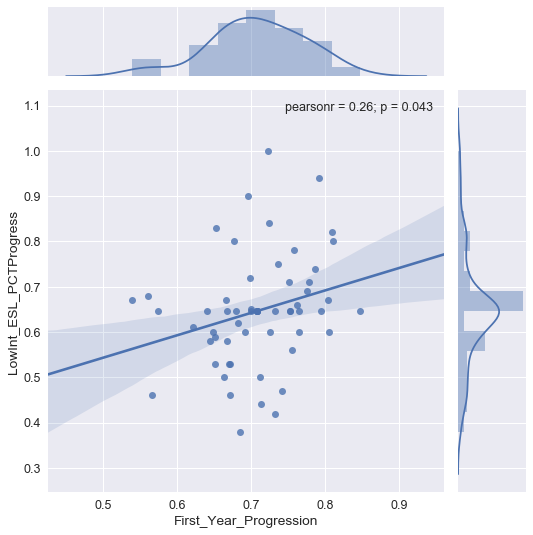

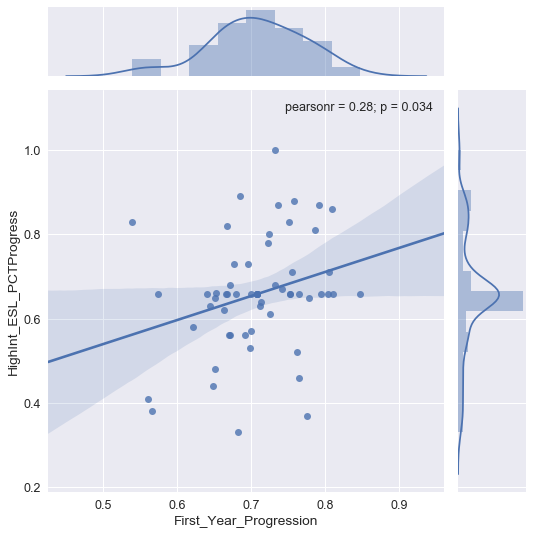

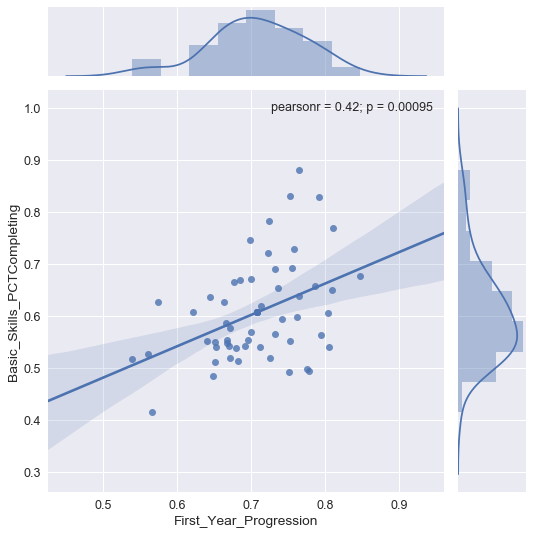

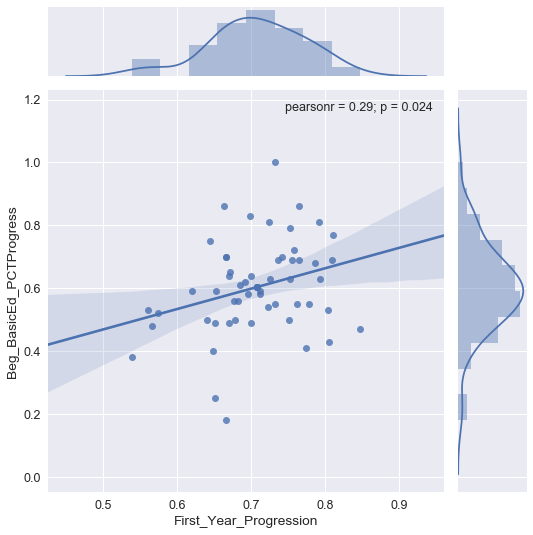

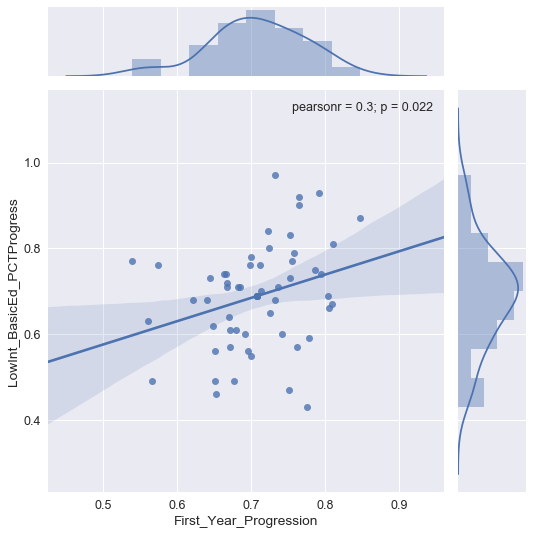

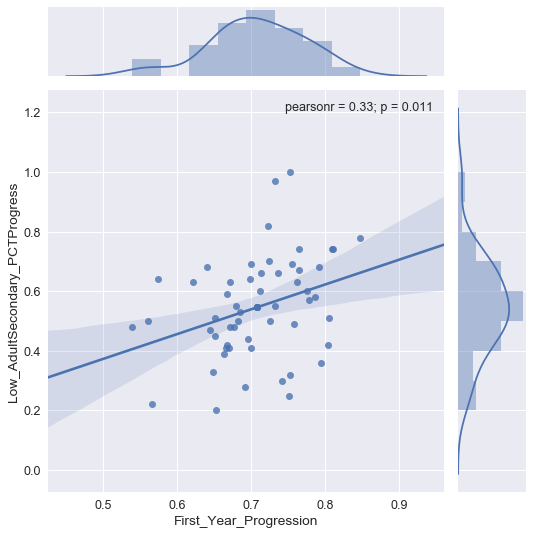

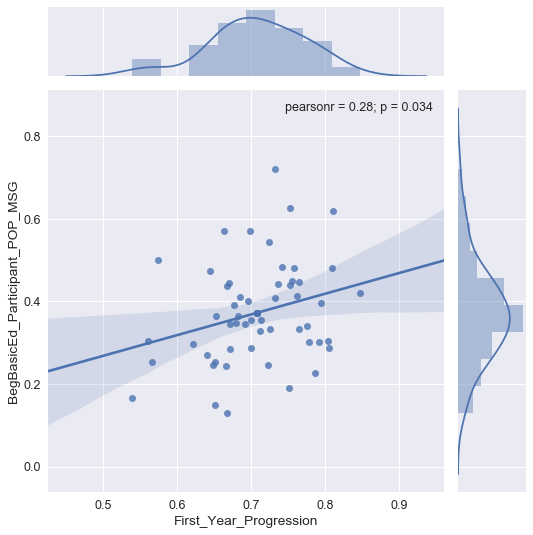

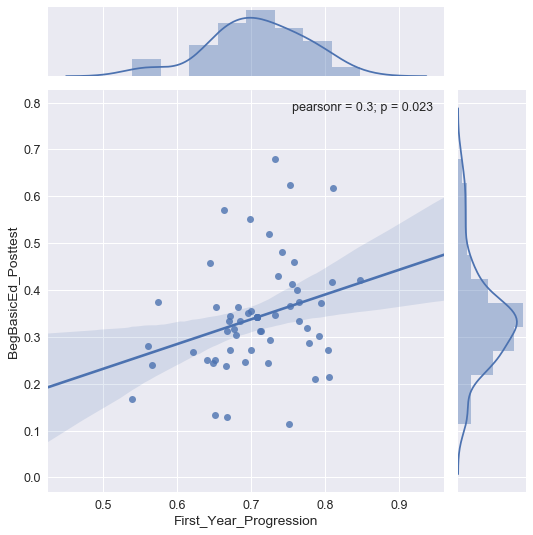

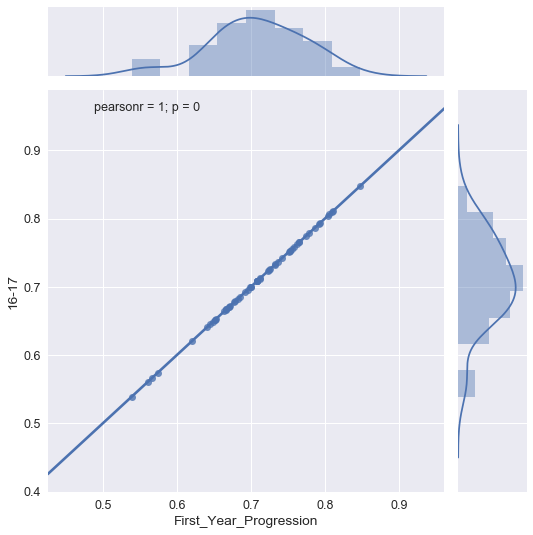

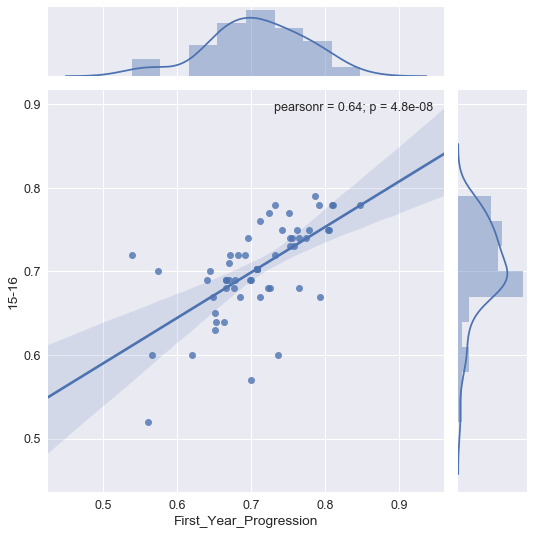

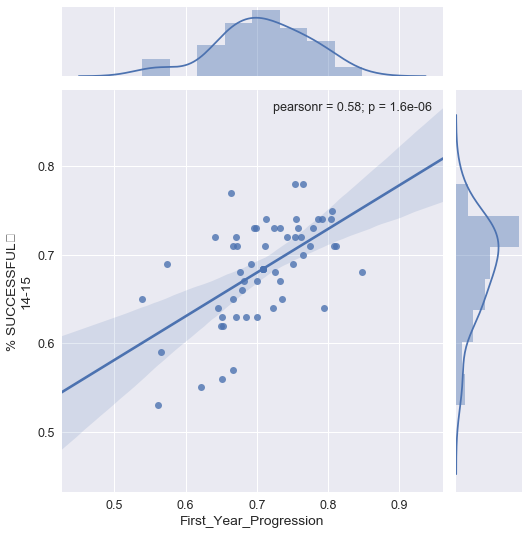

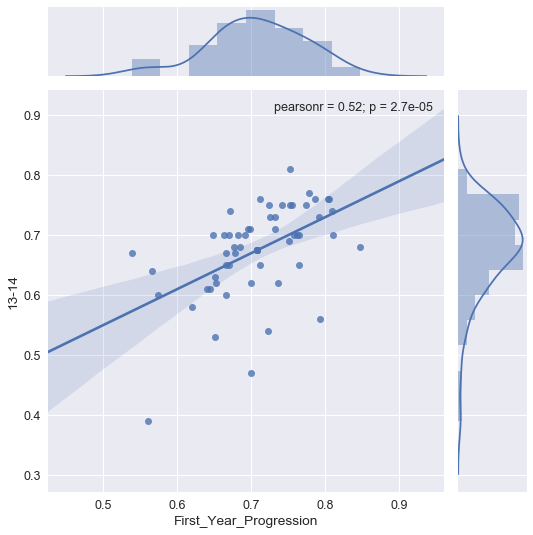

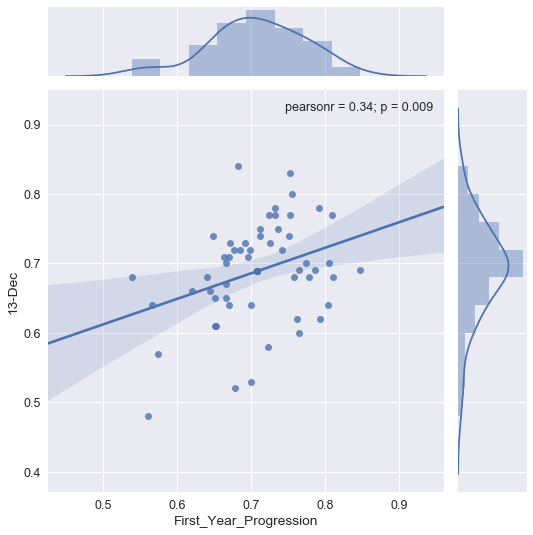

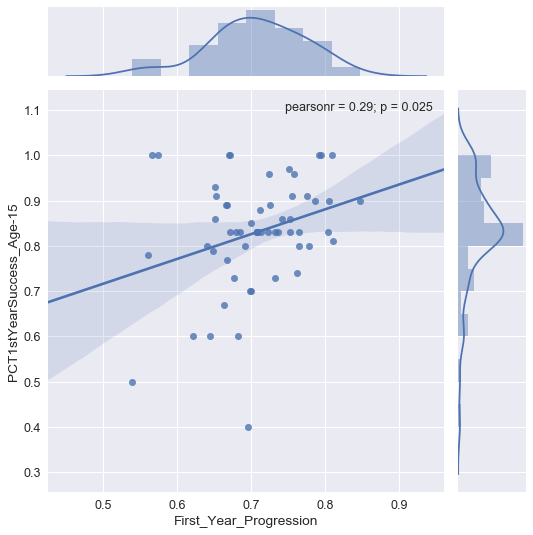

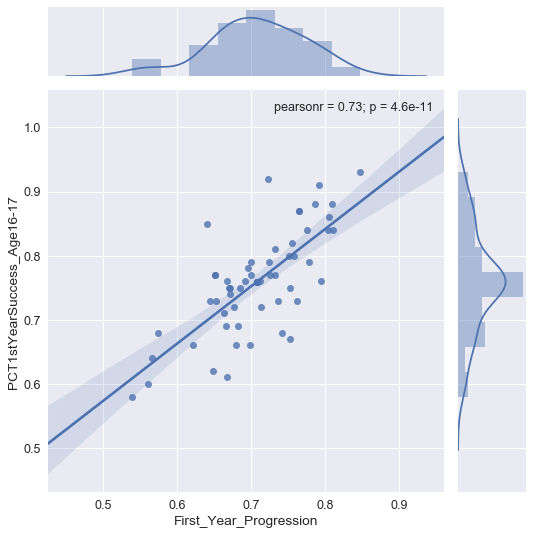

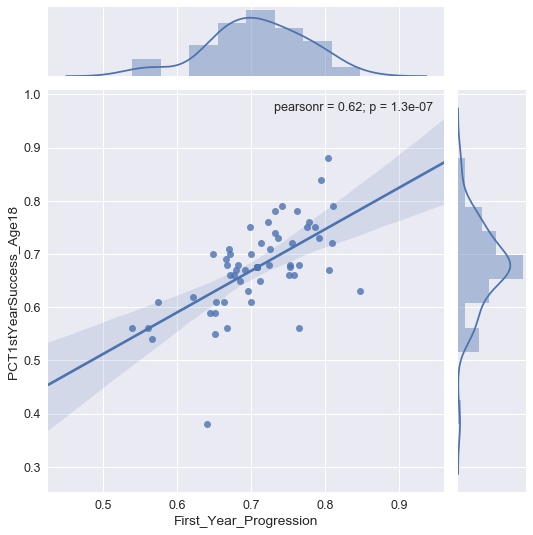

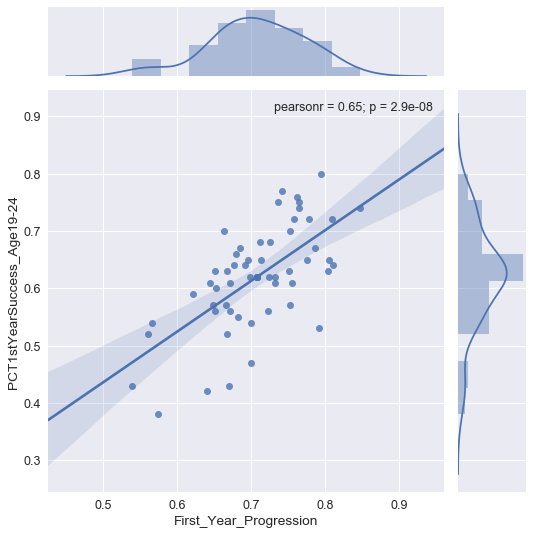

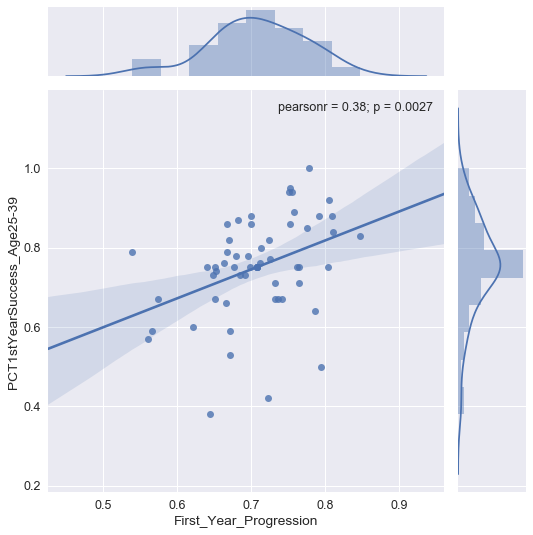

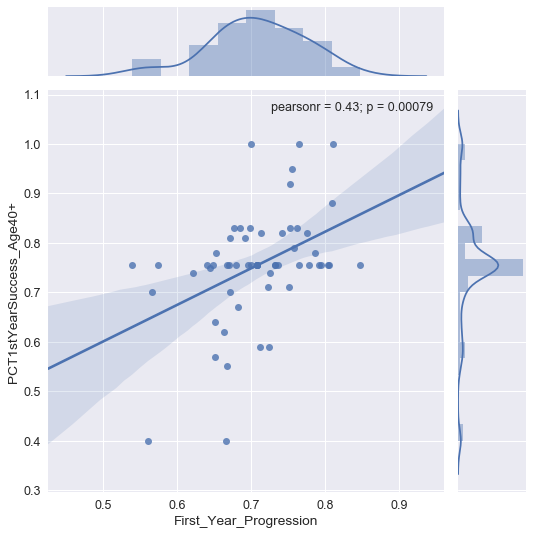

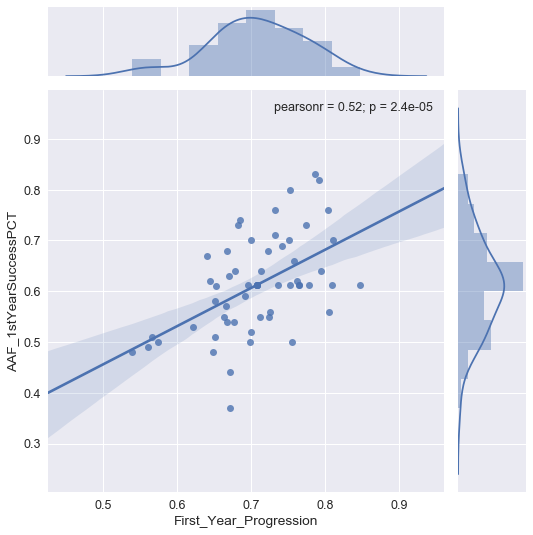

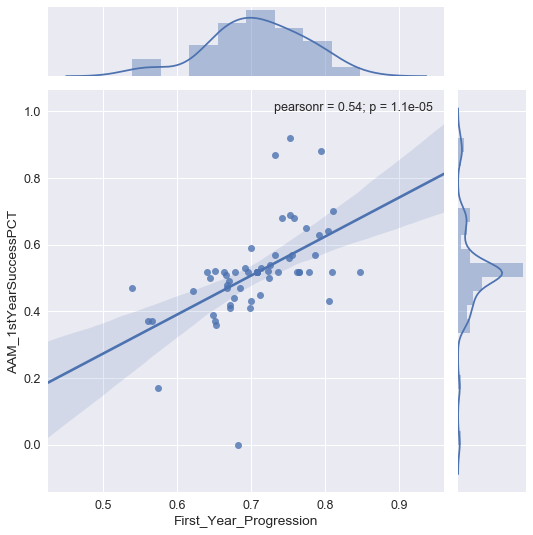

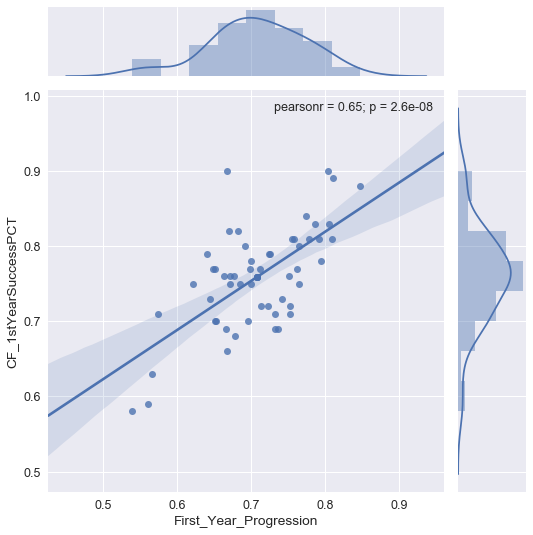

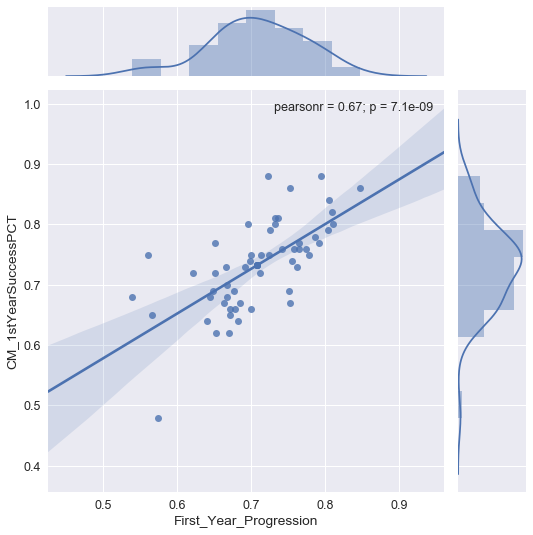

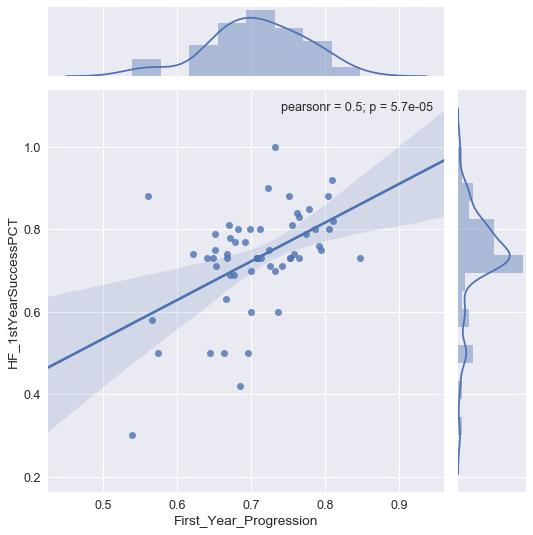

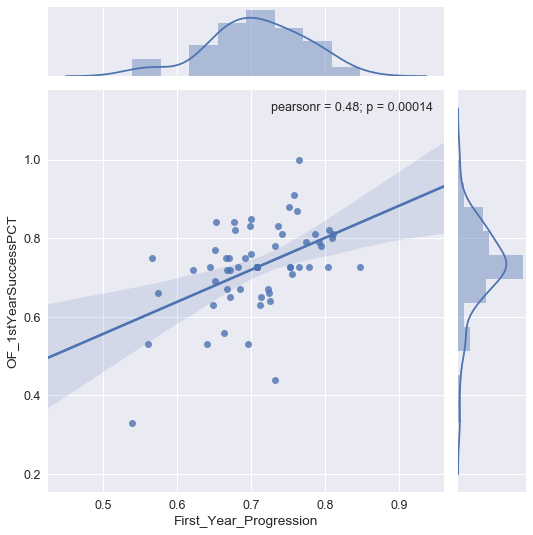

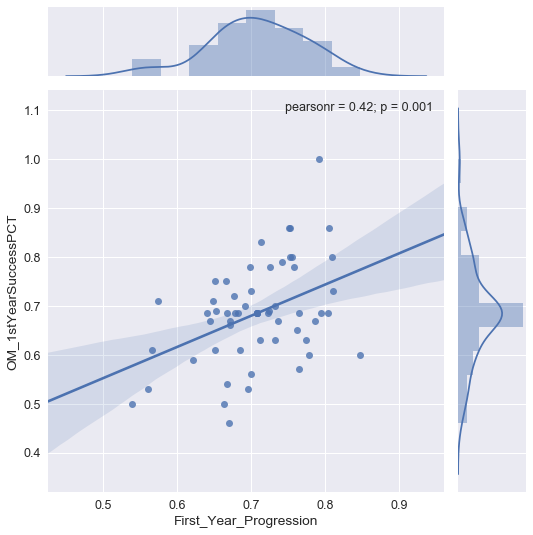

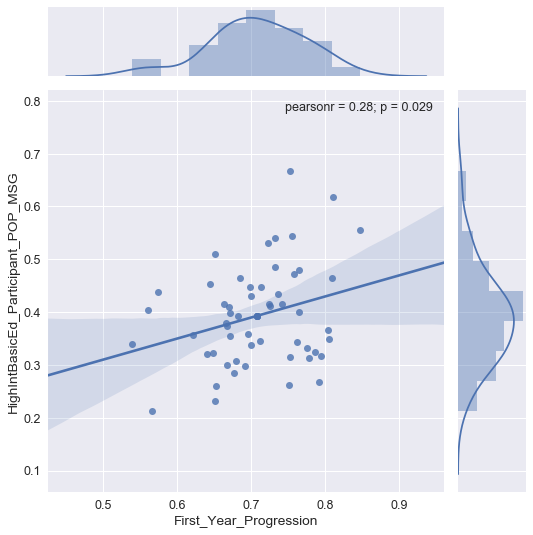

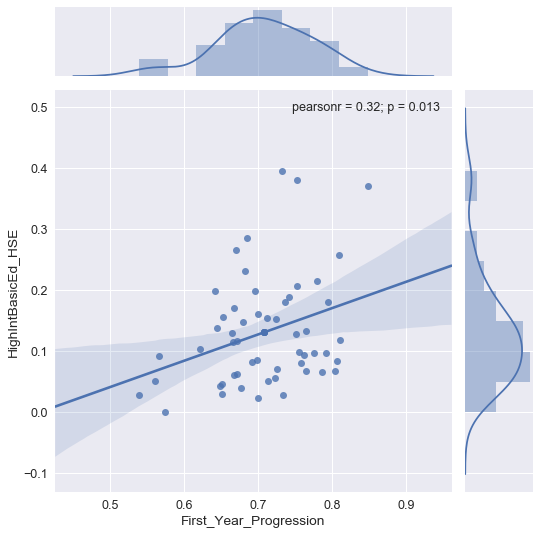

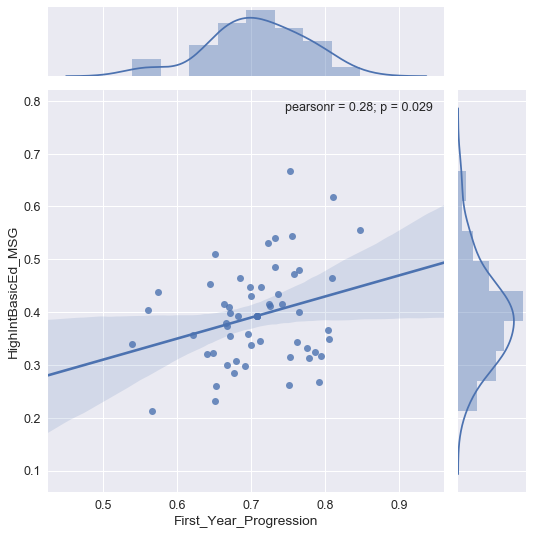

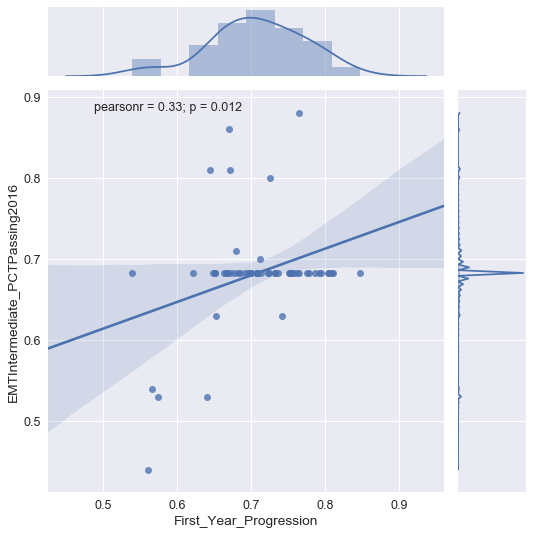

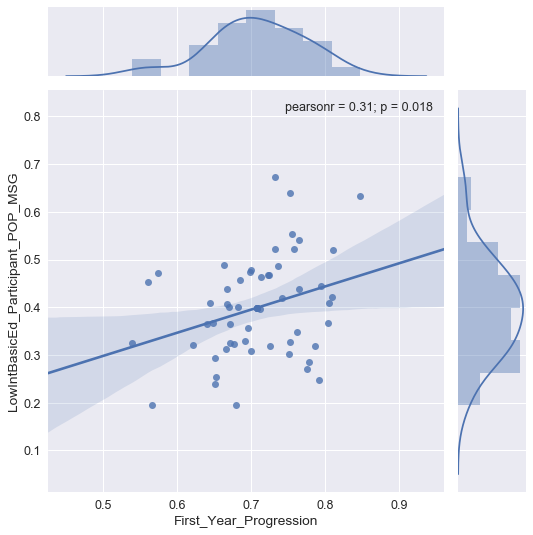

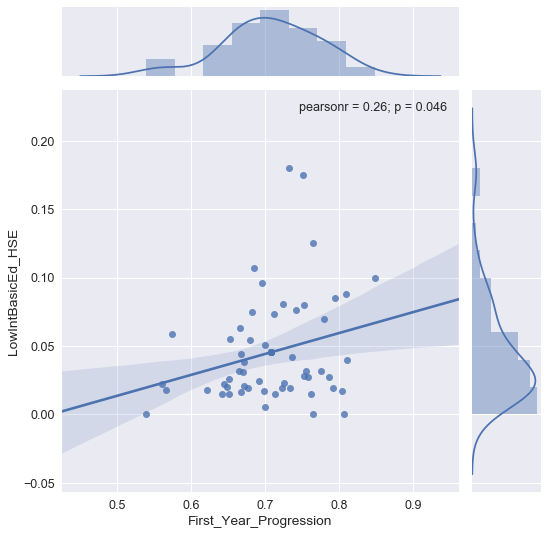

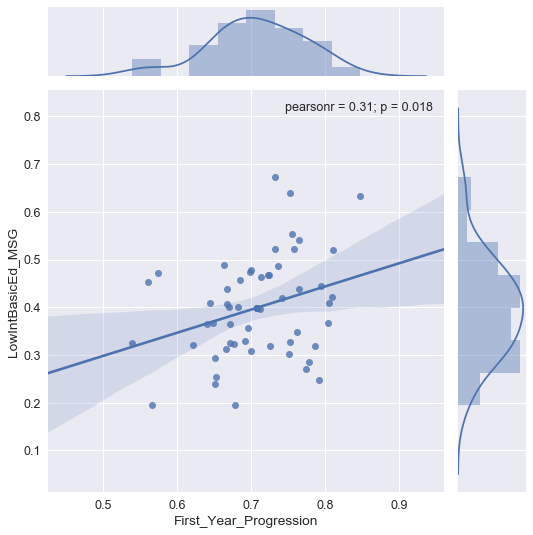

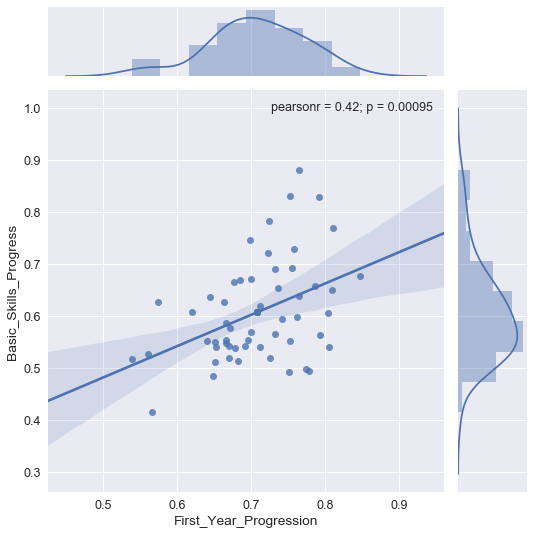

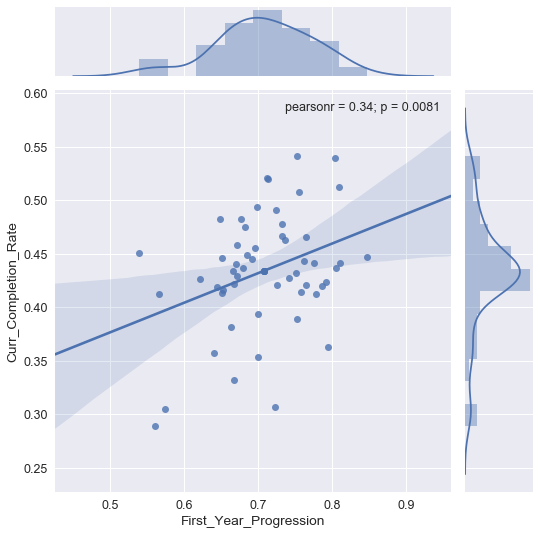

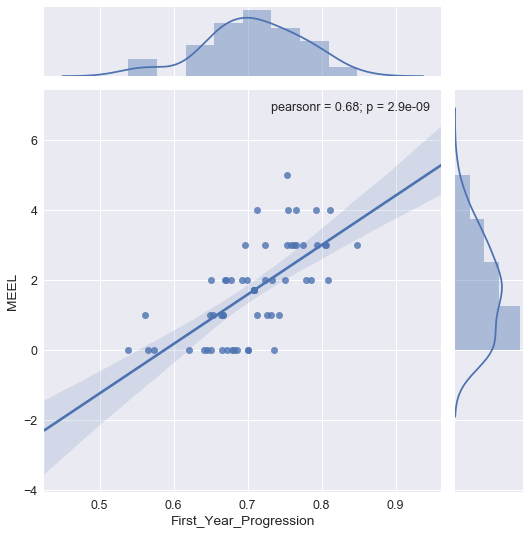

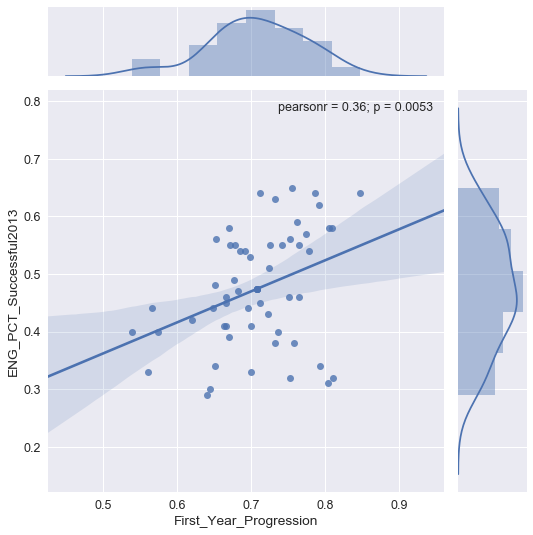

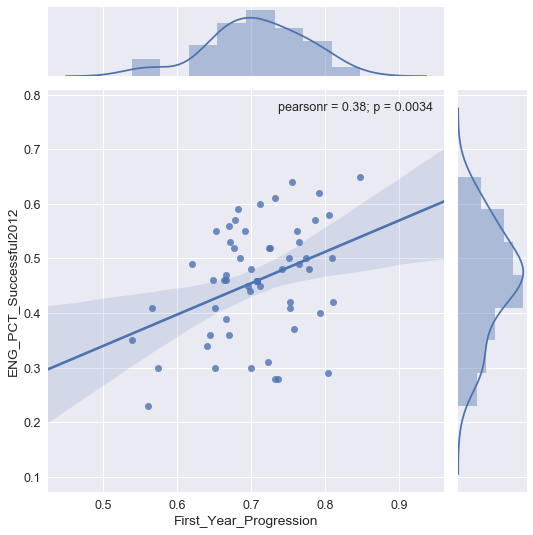

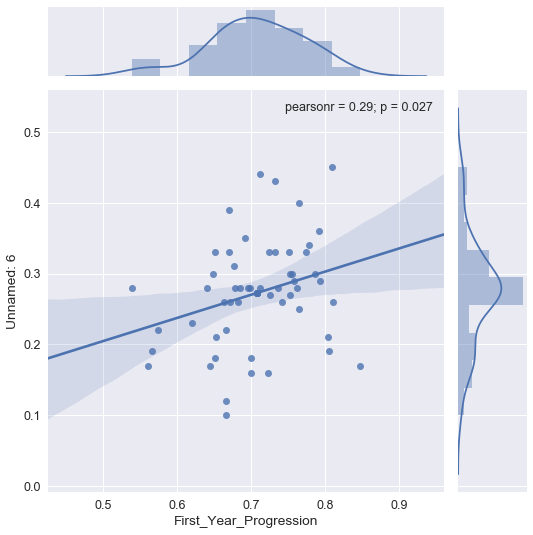

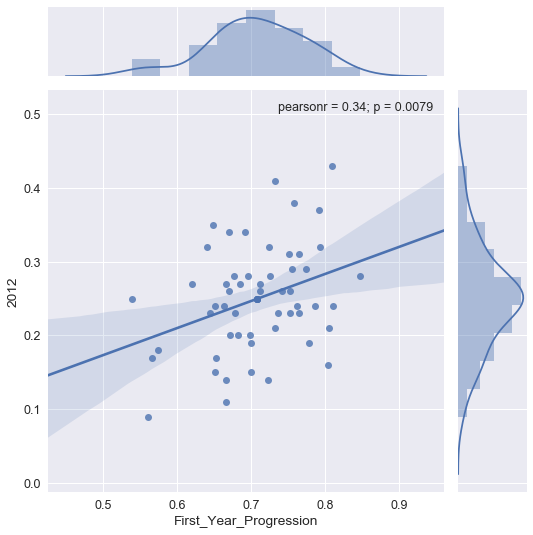

In [30]:
for col in pos_r:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lizzysterling/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

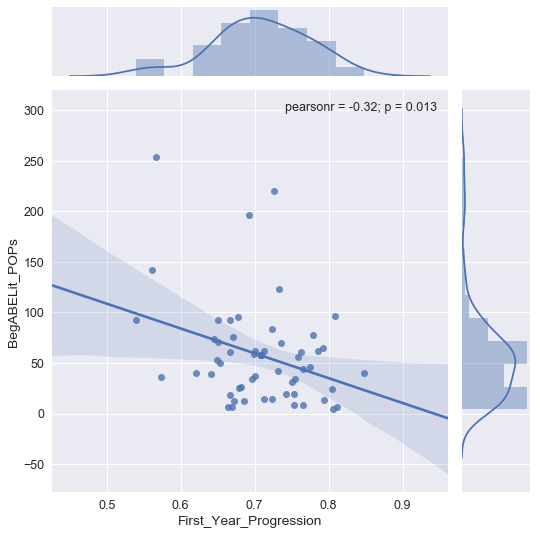

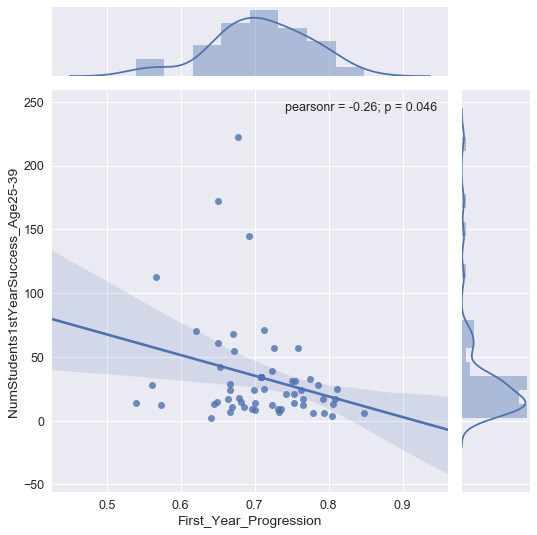

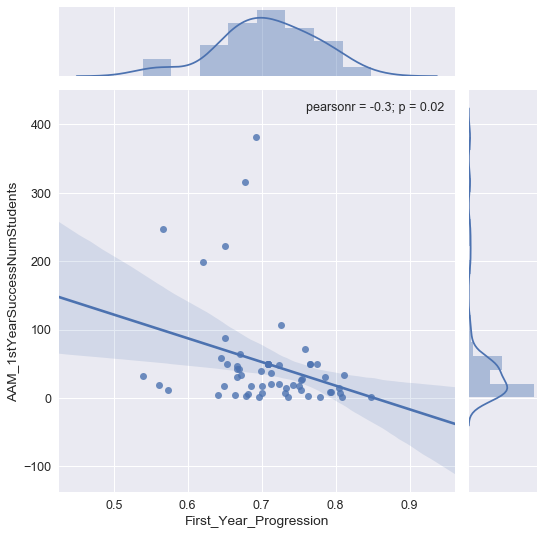

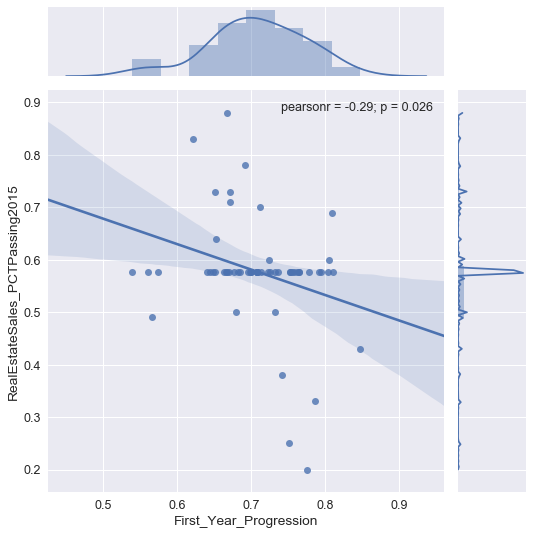

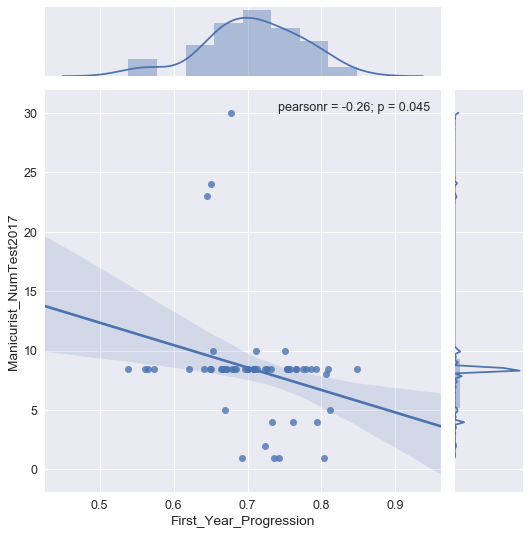

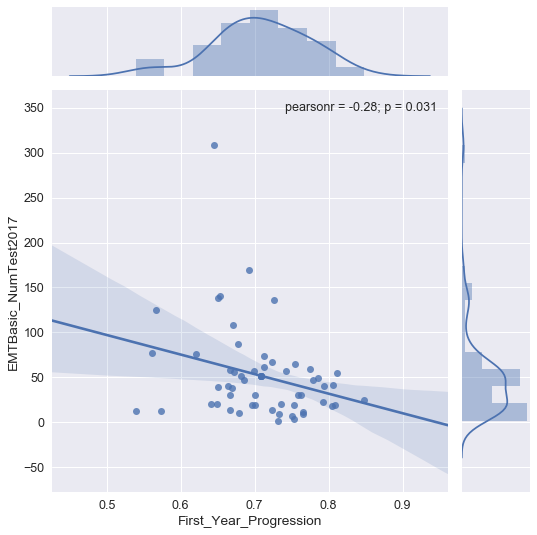

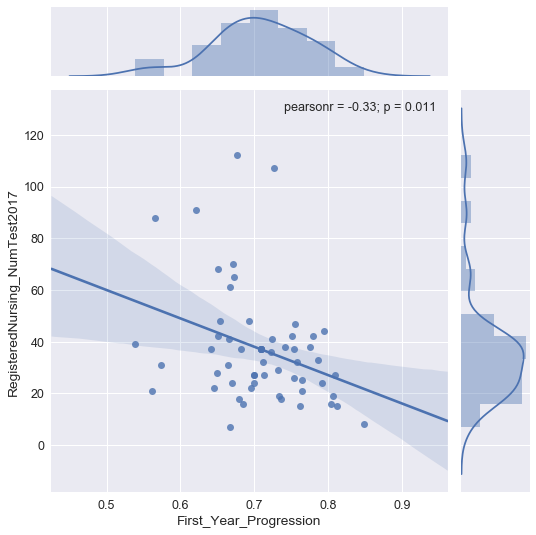

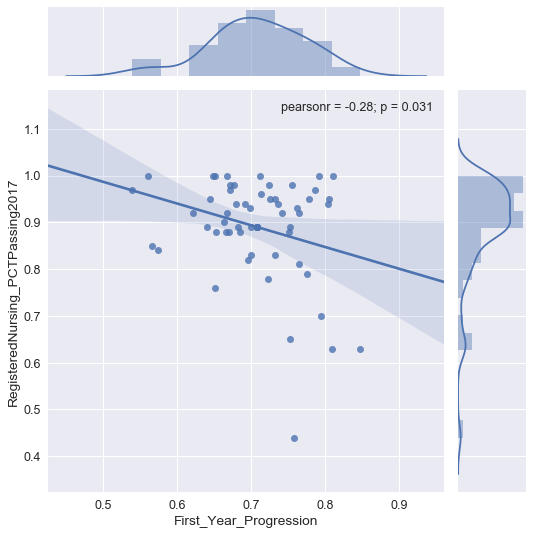

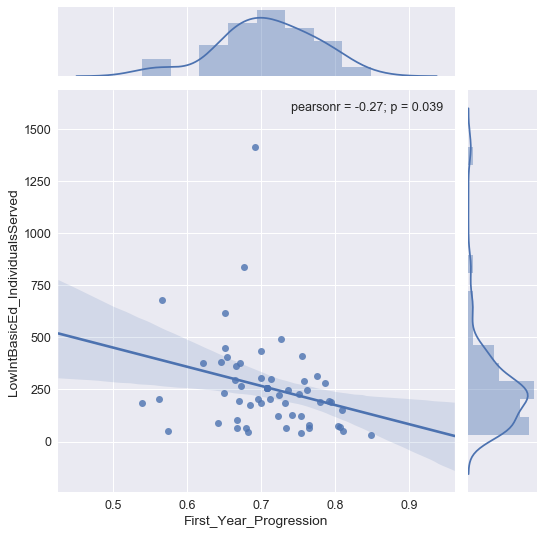

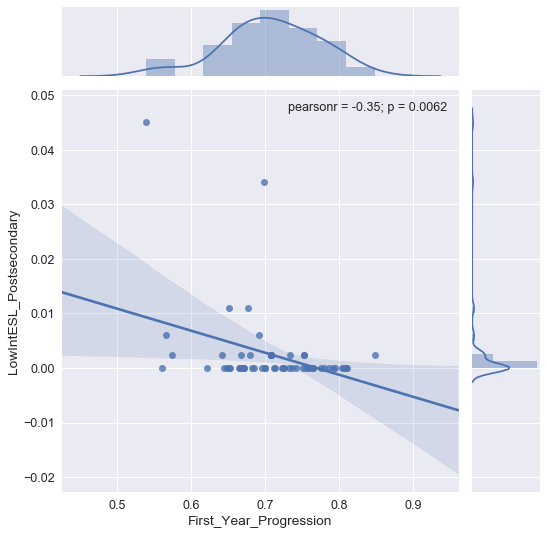

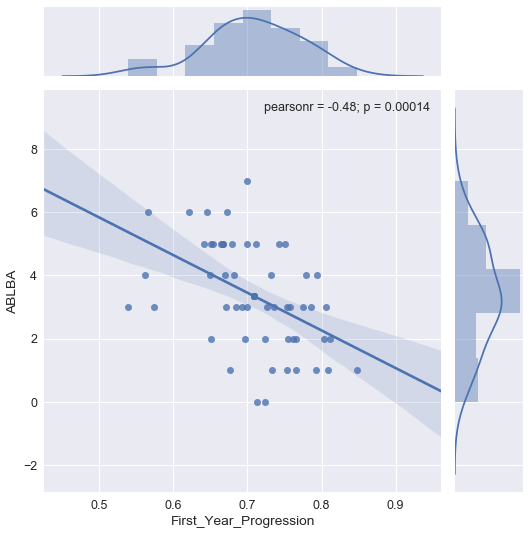

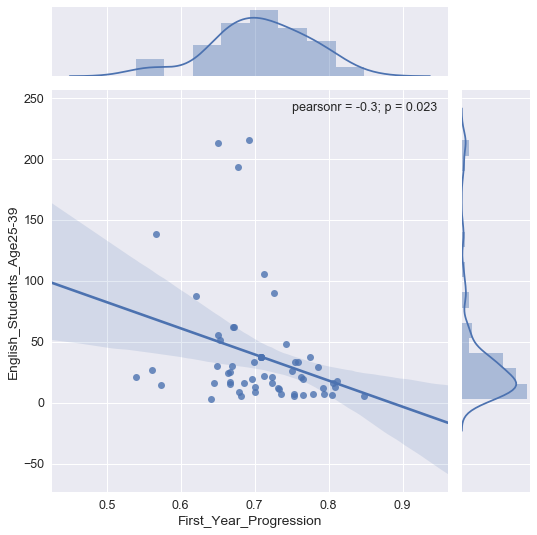

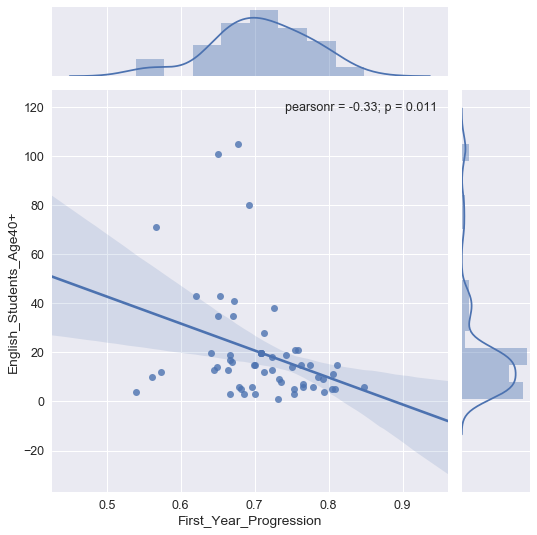

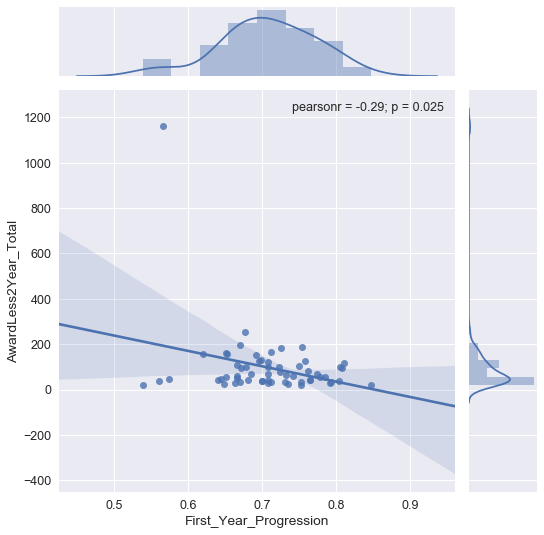

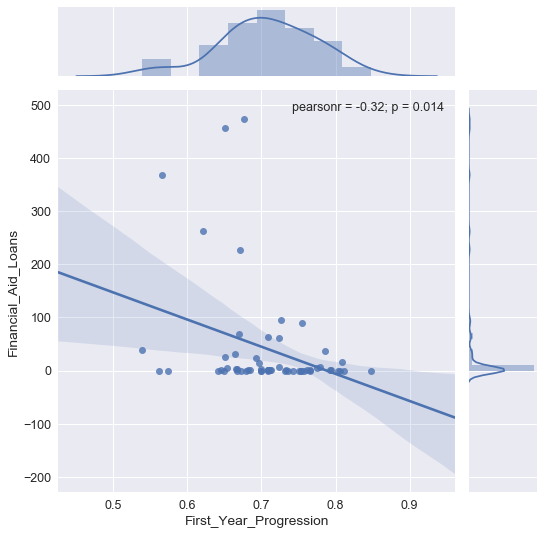

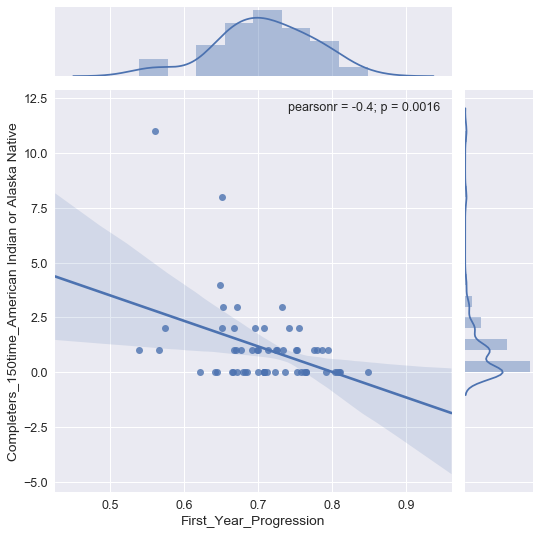

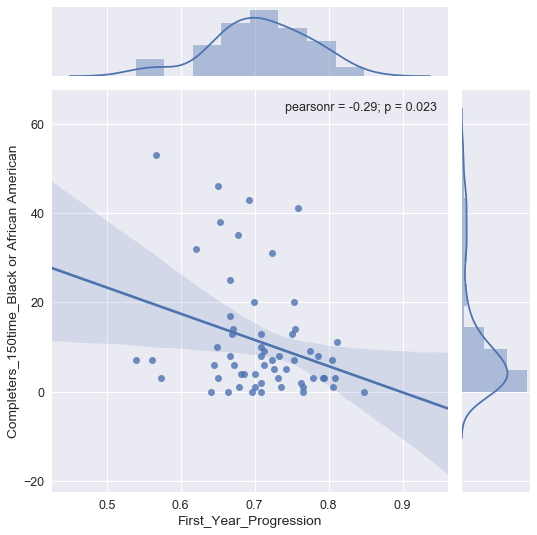

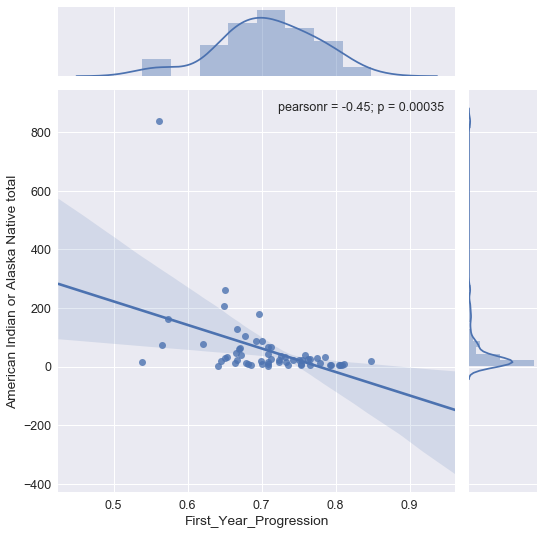

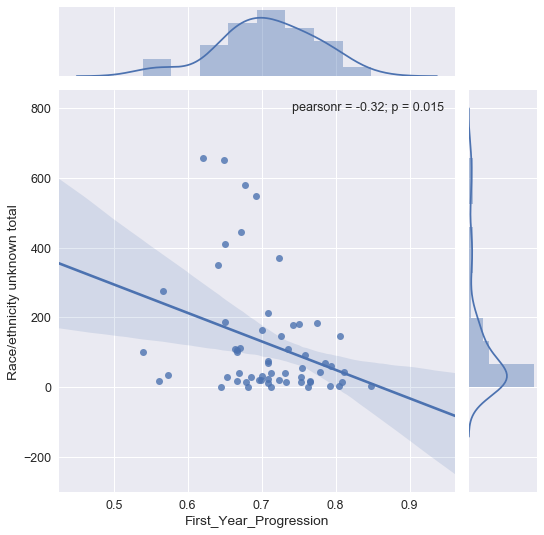

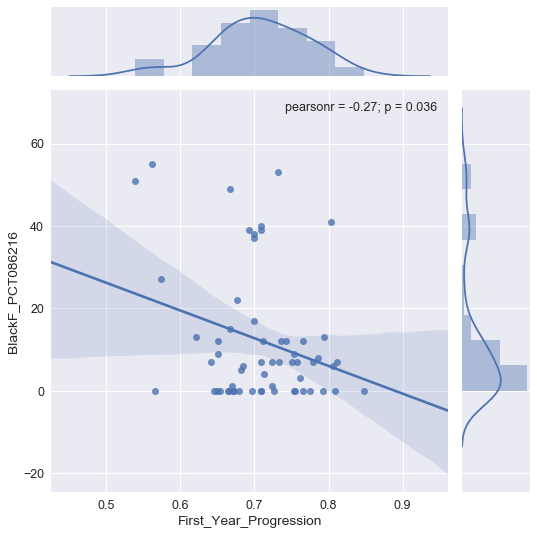

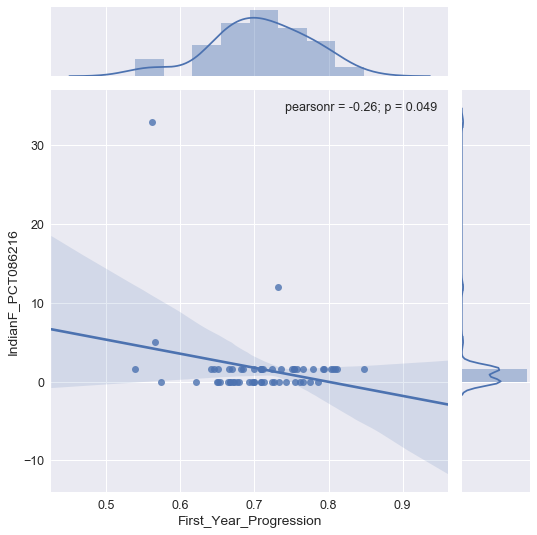

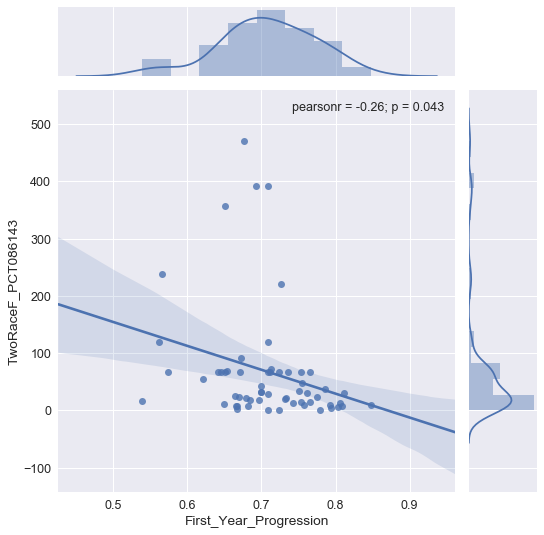

In [31]:
for col in neg_r:
    try:
        PlotJoint(x='First_Year_Progression',y=col, data=CC)
    except Exception:
        continue